# Dados de Imigração

## Fonte: [Observatório das migrações Internacionais (OBMigra), Ministério da Justiça e Segurança Pública](https://datamigra.mj.gov.br/#/public/bases/sisMigraAnoEntrada)

### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Selecionando a paleta de cores para os gráficos

In [2]:
colors = sns.color_palette("Spectral", n_colors=27)

### Importando os dados

In [3]:
df = pd.read_excel("Datamigra Frontend.xlsx")
df

,ANO ENTRADA,UNIDADE DA FEDERAÇÃO,PAÍS,CONTINENTE,MUNICÍPIO,CLASSIFICAÇÃO,SEXO,TOTAL
0,2013,ACRE,TOGO,ÁFRICA,NaN,RESIDENTE,NaN,1
1,2013,ALAGOAS,ANGOLA,ÁFRICA,NaN,RESIDENTE,NaN,2
2,2013,ALAGOAS,BENIN,ÁFRICA,NaN,RESIDENTE,NaN,1
3,2013,ALAGOAS,CABO VERDE,ÁFRICA,NaN,RESIDENTE,NaN,1
4,2013,ALAGOAS,EGITO,ÁFRICA,NaN,RESIDENTE,NaN,1
...,...,...,...,...,...,...,...,...
12781,2022,RIO DE JANEIRO,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12782,2022,RIO GRANDE DO SUL,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12783,2022,SANTA CATARINA,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12784,2022,SÃO PAULO,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,15


### Mudando os nomes das colunas

In [4]:
df.columns =["ano_entrada", "UF", "país", "continente",
             "município", "status", "gênero", "total"]

### Número total de imigrantes ao longo dos últimos 10 anos:

In [5]:
sum(df["total"])

279311

# Dados gerais de cada ano

In [6]:
def per_year(data):
    years = []
    imigrantes = []
    for name in data['ano_entrada']:
        individual_df = data[data['ano_entrada'] == name]
        n_imigrantes = sum(individual_df['total'])
        individual_df = individual_df.drop_duplicates('ano_entrada')
        if name not in years:
            years.append(individual_df['ano_entrada'].values[0])
            imigrantes.append(n_imigrantes)
    new_df = pd.DataFrame({"ano_entrada":years,
                           "total":imigrantes})
    return new_df

all_years_numbers = per_year(df)
all_years_numbers = all_years_numbers.sort_values(by='ano_entrada',ignore_index=True)
all_years_numbers

,ano_entrada,total
0,2013,37358
1,2014,46903
2,2015,43533
3,2016,38944
4,2017,29990
5,2018,25995
6,2019,22732
7,2020,9031
8,2021,10296
9,2022,14529


## Gráfico de barras

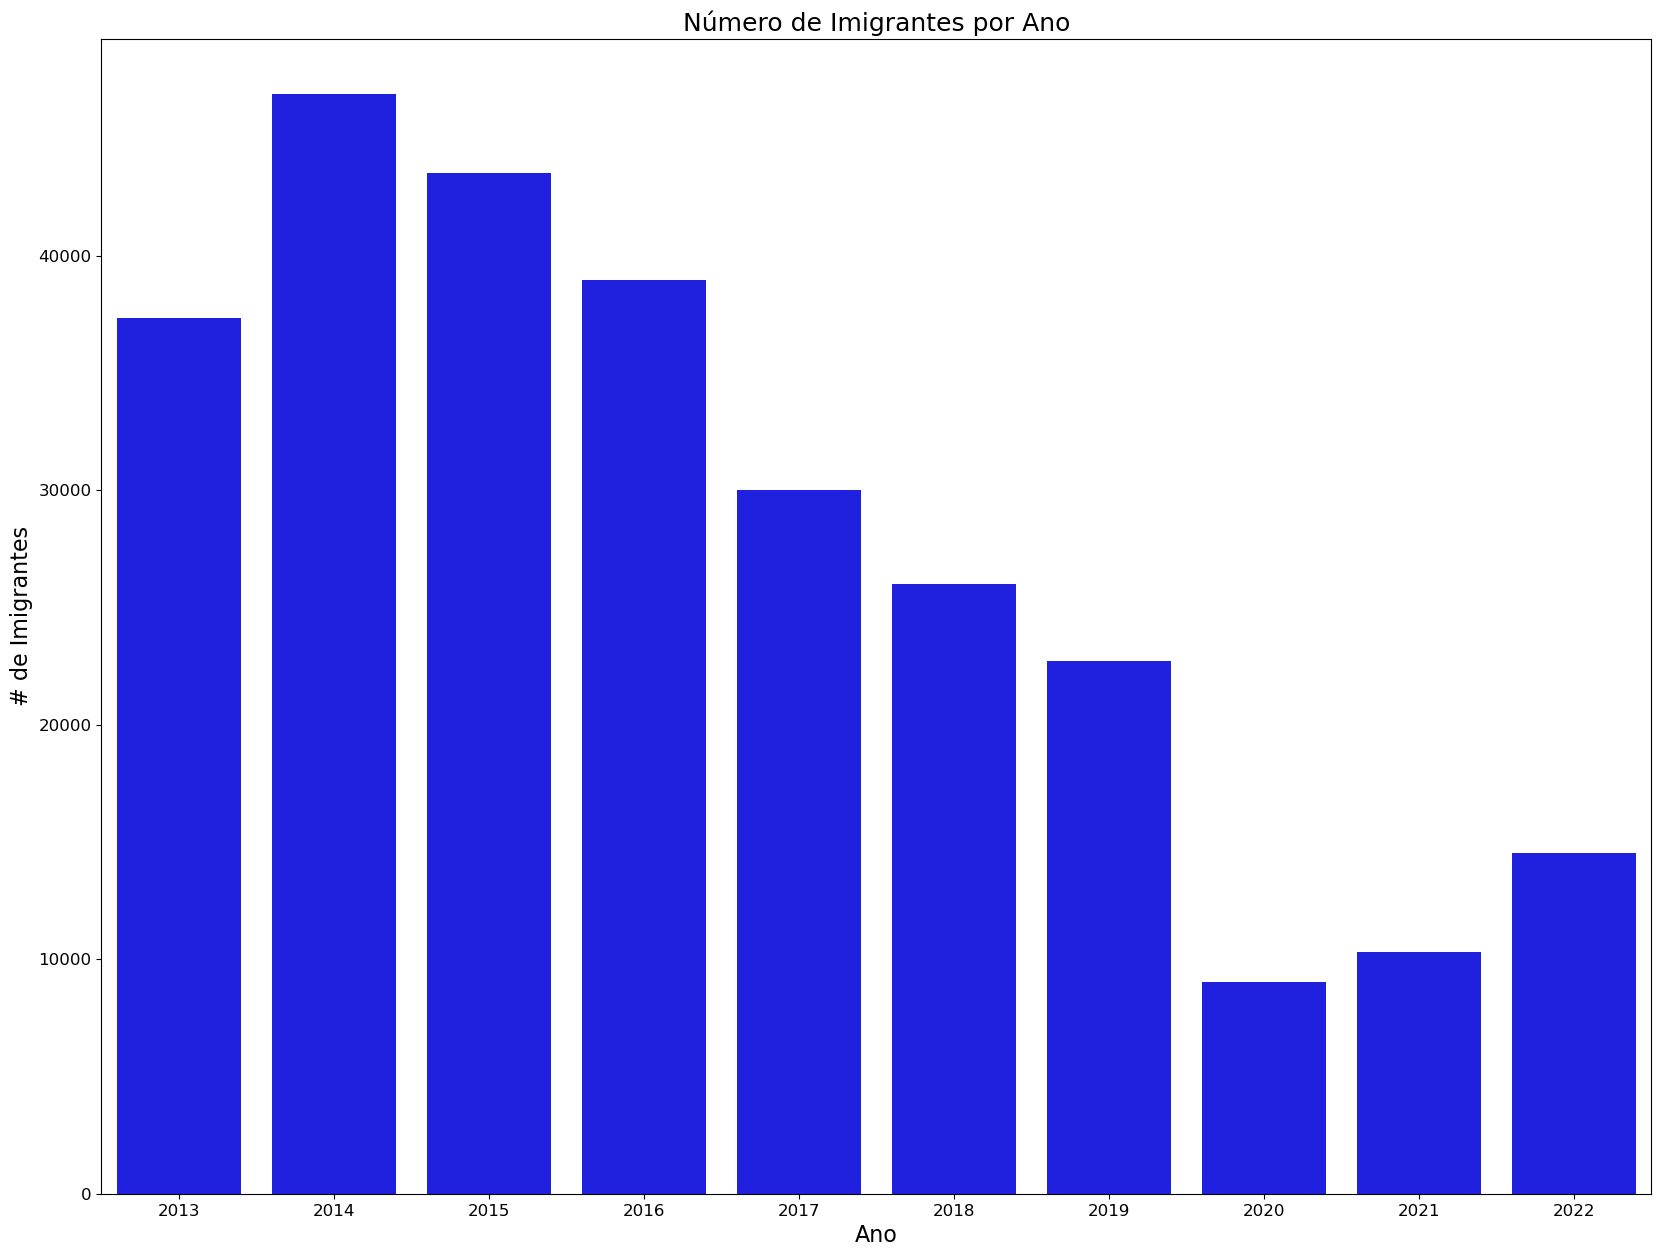

In [7]:
plt.figure(figsize=(20,15))
ax = sns.barplot(all_years_numbers,x='ano_entrada',y='total',color='blue')
ax.axes.set_title("Número de Imigrantes por Ano",fontsize=18)
ax.set_xlabel("Ano",fontsize=16)
ax.set_ylabel("# de Imigrantes",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

In [8]:
list_years = list(all_years_numbers['ano_entrada'])
list_immigrants = list(all_years_numbers['total'])
years_series = pd.Series(list_immigrants, index=list_years)
years_series

2013    37358
2014    46903
2015    43533
2016    38944
2017    29990
2018    25995
2019    22732
2020     9031
2021    10296
2022    14529
dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x232918dd250>,
 [Text(1.0043126974376435, 0.4487270949759159, '2013'),
  Text(0.2216275013604051, 1.077441994095619, '2014'),
  Text(-0.7999882184781963, 0.7549959273374142, '2015'),
  Text(-1.083919047836393, -0.1874019683393101, '2016'),
  Text(-0.6429379950113502, -0.8925417270754266, '2017'),
  Text(0.005994418770754131, -1.0999836666712834, '2018'),
  Text(0.5782475601371535, -0.9357509065961033, '2019'),
  Text(0.8689756938051398, -0.6744488442987178, '2020'),
  Text(0.9939864274264109, -0.47115918975658394, '2021'),
  Text(1.0853448298554436, -0.1789597728710515, '2022')],
 [Text(0.5478069258750782, 0.2447602336232268, '13.38%'),
  Text(0.12088772801476641, 0.5876956331430648, '16.79%'),
  Text(-0.4363572100790161, 0.4118159603658622, '15.59%'),
  Text(-0.5912285715471233, -0.1022192554578055, '13.94%'),
  Text(-0.3506934518243728, -0.4868409420411417, '10.74%'),
  Text(0.0032696829658658898, -0.5999910909116091, '9.31%'),
  Text(0.315407760074810

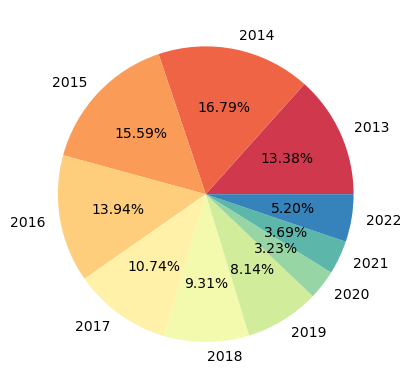

In [9]:
plt.pie(years_series, labels=years_series.index,
        colors=sns.color_palette("Spectral",n_colors=10),
        autopct='%1.2f%%')

# Dados gerais de cada país (últimos 10 anos)

In [10]:
def per_country(data):
    countries = []
    imigrantes = []
    for name in data['país']:
        individual_df = data[data['país'] == name]
        n_imigrantes = sum(individual_df['total'])
        individual_df = individual_df.drop_duplicates('país')
        if name not in countries:
            countries.append(individual_df['país'].values[0])
            imigrantes.append(n_imigrantes)
    new_df = pd.DataFrame({"país":countries,
                           "total":imigrantes})
    return new_df

all_years_countries = per_country(df)
all_years_countries

,país,total
0,TOGO,355
1,ANGOLA,5114
2,BENIN,180
3,CABO VERDE,350
4,EGITO,1144
...,...,...
185,DJIBUTI,5
186,ANTÍGUA E BARBUDA,1
187,SANTA LÚCIA,1
188,IUGOSLÁVIA,2


In [11]:
all_years_countries = all_years_countries.sort_values(by='total', ascending=False,
                                                      ignore_index=True)
all_years_countries

,país,total
0,HAITI,94097
1,VENEZUELA,21856
2,CHINA,16354
3,URUGUAI,13182
4,PORTUGAL,9638
...,...,...
185,ILHAS MARSHALL,1
186,CORÉIA DO NORTE,1
187,ANTÍGUA E BARBUDA,1
188,SANTA LÚCIA,1


In [12]:
all_years_countries.head(10)

,país,total
0,HAITI,94097
1,VENEZUELA,21856
2,CHINA,16354
3,URUGUAI,13182
4,PORTUGAL,9638
5,ITÁLIA,7934
6,ARGENTINA,7584
7,CUBA,7447
8,SÍRIA,6012
9,FRANÇA,5771


In [13]:
top_50 = all_years_countries.head(50)
top_50

,país,total
0,HAITI,94097
1,VENEZUELA,21856
2,CHINA,16354
3,URUGUAI,13182
4,PORTUGAL,9638
5,ITÁLIA,7934
6,ARGENTINA,7584
7,CUBA,7447
8,SÍRIA,6012
9,FRANÇA,5771


## Gráfico de barras dos primeiros 50 países (escala logarítmica para facilitar visualização)

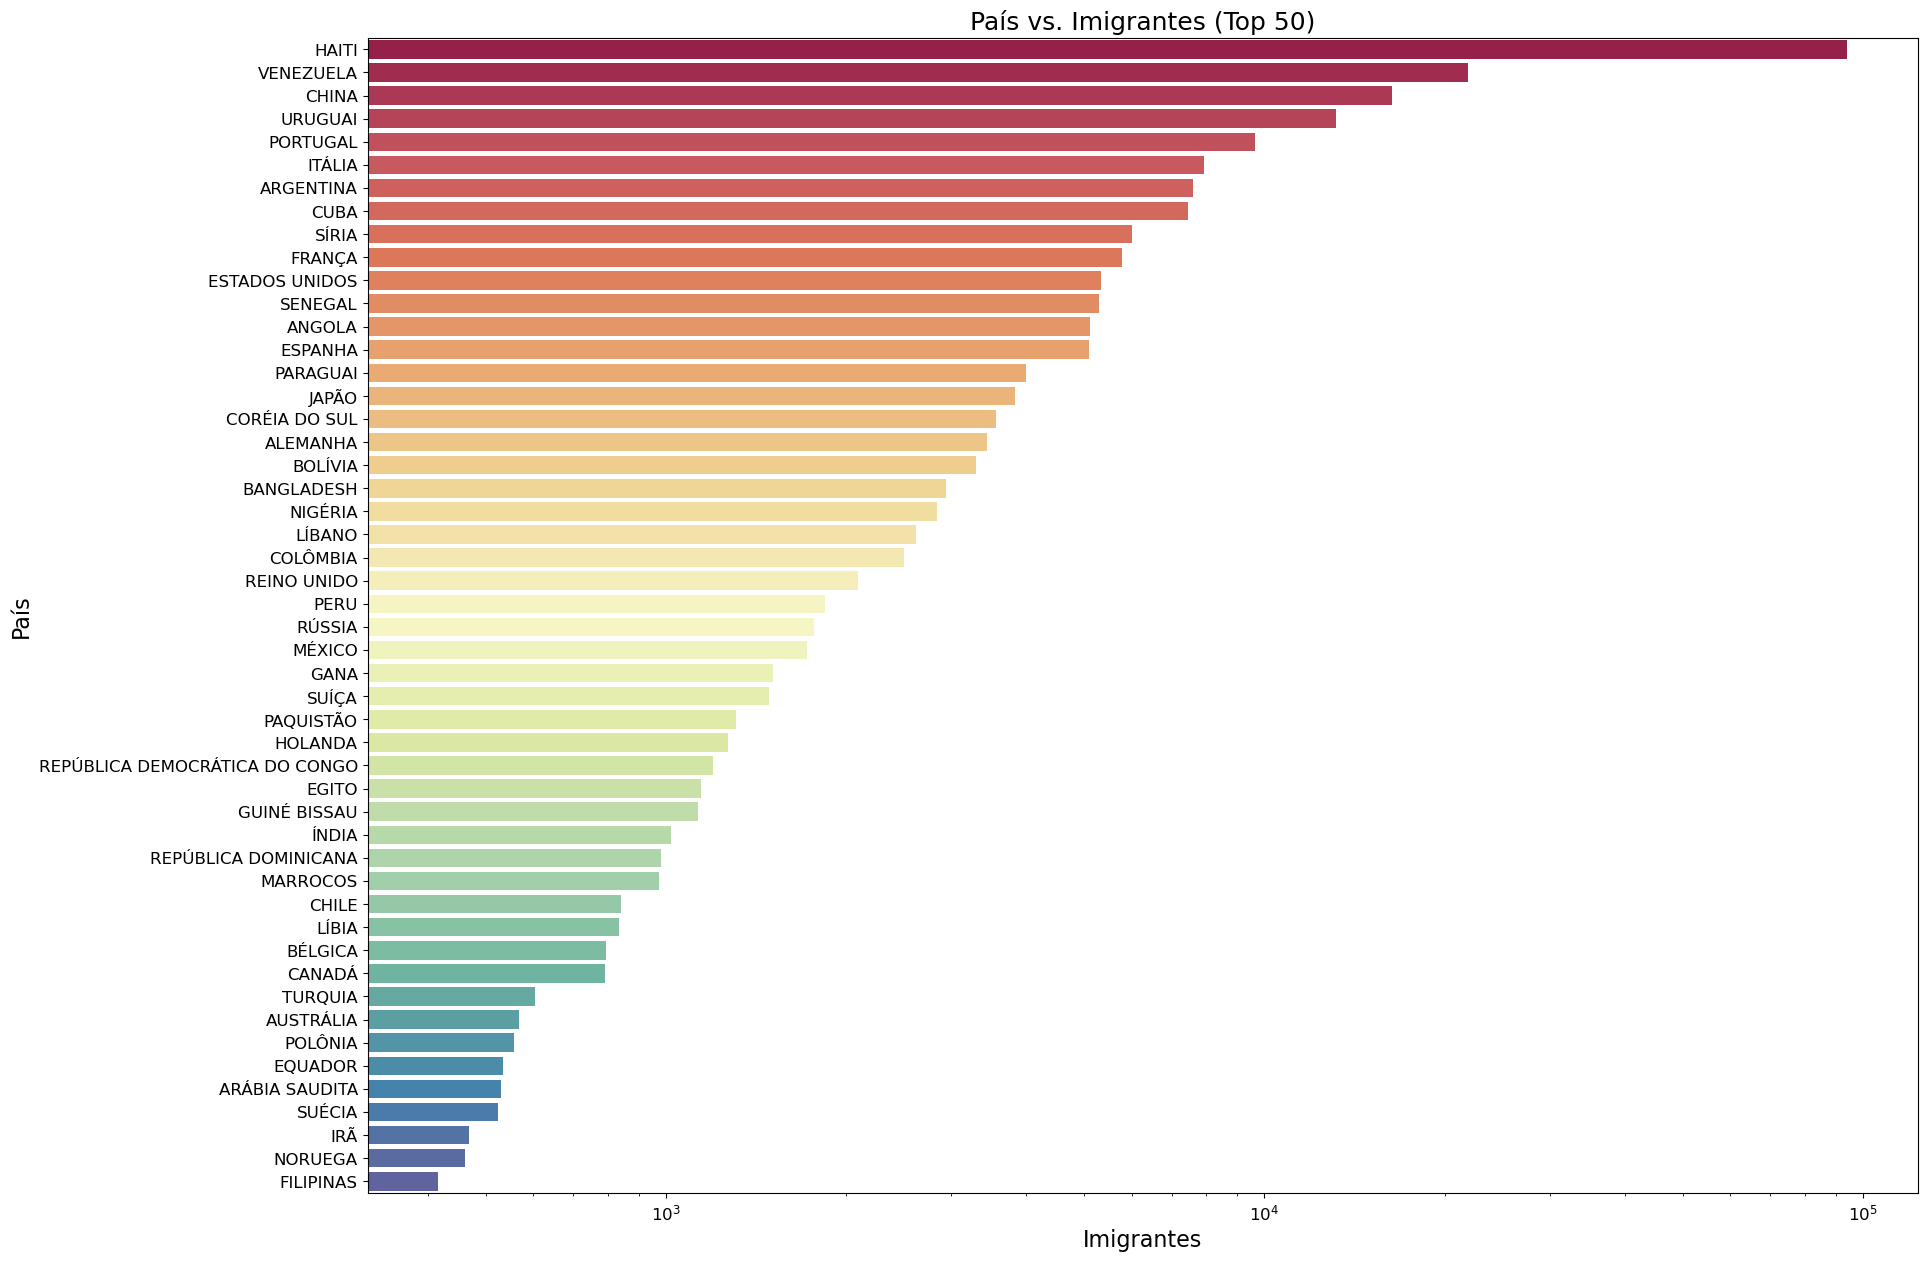

In [14]:
plt.figure(figsize=(20,15))
ax_log = sns.barplot(top_50,x='total',y='país',palette="Spectral")
ax_log.axes.set_title("País vs. Imigrantes (Top 50)",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("País",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [15]:
list_countries = list(all_years_countries['país'])
list_totals = list(all_years_countries['total'])
countries_series = pd.Series(list_totals, index=list_countries)
countries_series

HAITI                94097
VENEZUELA            21856
CHINA                16354
URUGUAI              13182
PORTUGAL              9638
                     ...  
ILHAS MARSHALL           1
CORÉIA DO NORTE          1
ANTÍGUA E BARBUDA        1
SANTA LÚCIA              1
CHADE                    1
Length: 190, dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x23290ff3190>,
 [Text(0.5393224681127169, 0.9587133437001947, 'HAITI'),
  Text(-0.782759952611219, 0.7728433583774156, 'VENEZUELA'),
  Text(-1.0335923047150464, 0.37641326707999934, 'CHINA'),
  Text(-1.0998403027986996, 0.018743221165661038, 'URUGUAI'),
  Text(-1.0685681092039705, -0.2610789075974001, 'PORTUGAL'),
  Text(-0.9964998822479645, -0.46581969116793787, 'ITÁLIA'),
  Text(-0.9004669371496322, -0.6317905468589734, 'ARGENTINA'),
  Text(-0.7813242002037484, -0.774294836723049, 'CUBA'),
  Text(-0.6556214281659091, -0.8832669714925911, 'SÍRIA'),
  Text(-0.5331540874797105, -0.9621573254949928, 'FRANÇA'),
  Text(-0.4090424865051698, -1.0211191136364397, 'ESTADOS UNIDOS'),
  Text(-0.28426562130755945, -1.0626349592134767, 'SENEGAL'),
  Text(-0.1582182439094198, -1.088561889510293, 'ANGOLA'),
  Text(-0.032404759731406996, -1.099522592558584, 'ESPANHA'),
  Text(0.08013323623840052, -1.0970773283820794, 'PARAGUAI'),
  Text(0.1764263555349073, -1.085759522

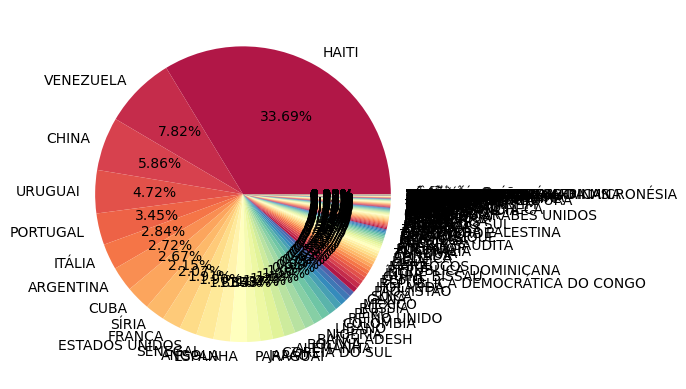

In [16]:
plt.pie(countries_series, labels=countries_series.index, colors=colors,
        autopct='%1.2f%%')

In [17]:
all_years_countries[all_years_countries['país'] == 'BRASIL']

,país,total
80,BRASIL,152


# ?????

## Descrição estatística

In [18]:
all_years_countries.describe()

,total
count,190.000000
mean,1470.057895
std,7252.750762
min,1.000000
25%,12.250000
50%,97.500000
75%,466.500000
max,94097.000000


# Dados gerais de cada Unidade da Federação (últimos 10 anos)

In [19]:
def per_uf(data):
    unidades = []
    imigrantes = []
    for name in data['UF']:
        individual_df = data[data['UF'] == name]
        n_imigrantes = sum(individual_df['total'])
        individual_df = individual_df.drop_duplicates('UF')
        if name not in unidades:
            unidades.append(individual_df['UF'].values[0])
            imigrantes.append(n_imigrantes)
    new_df = pd.DataFrame({"UF":unidades,
                           "total":imigrantes})
    return new_df

all_years_ufs = per_uf(df)
all_years_ufs = all_years_ufs.sort_values(by='total',ascending=False,ignore_index=True)
all_years_ufs

,UF,total
0,SÃO PAULO,90436
1,RIO GRANDE DO SUL,31149
2,SANTA CATARINA,30929
3,PARANÁ,28946
4,RIO DE JANEIRO,18317
5,MINAS GERAIS,10471
6,RORAIMA,9690
7,AMAZONAS,9298
8,BAHIA,6117
9,GOIÁS,5502


## Gráfico de barras (escala logarítmica)

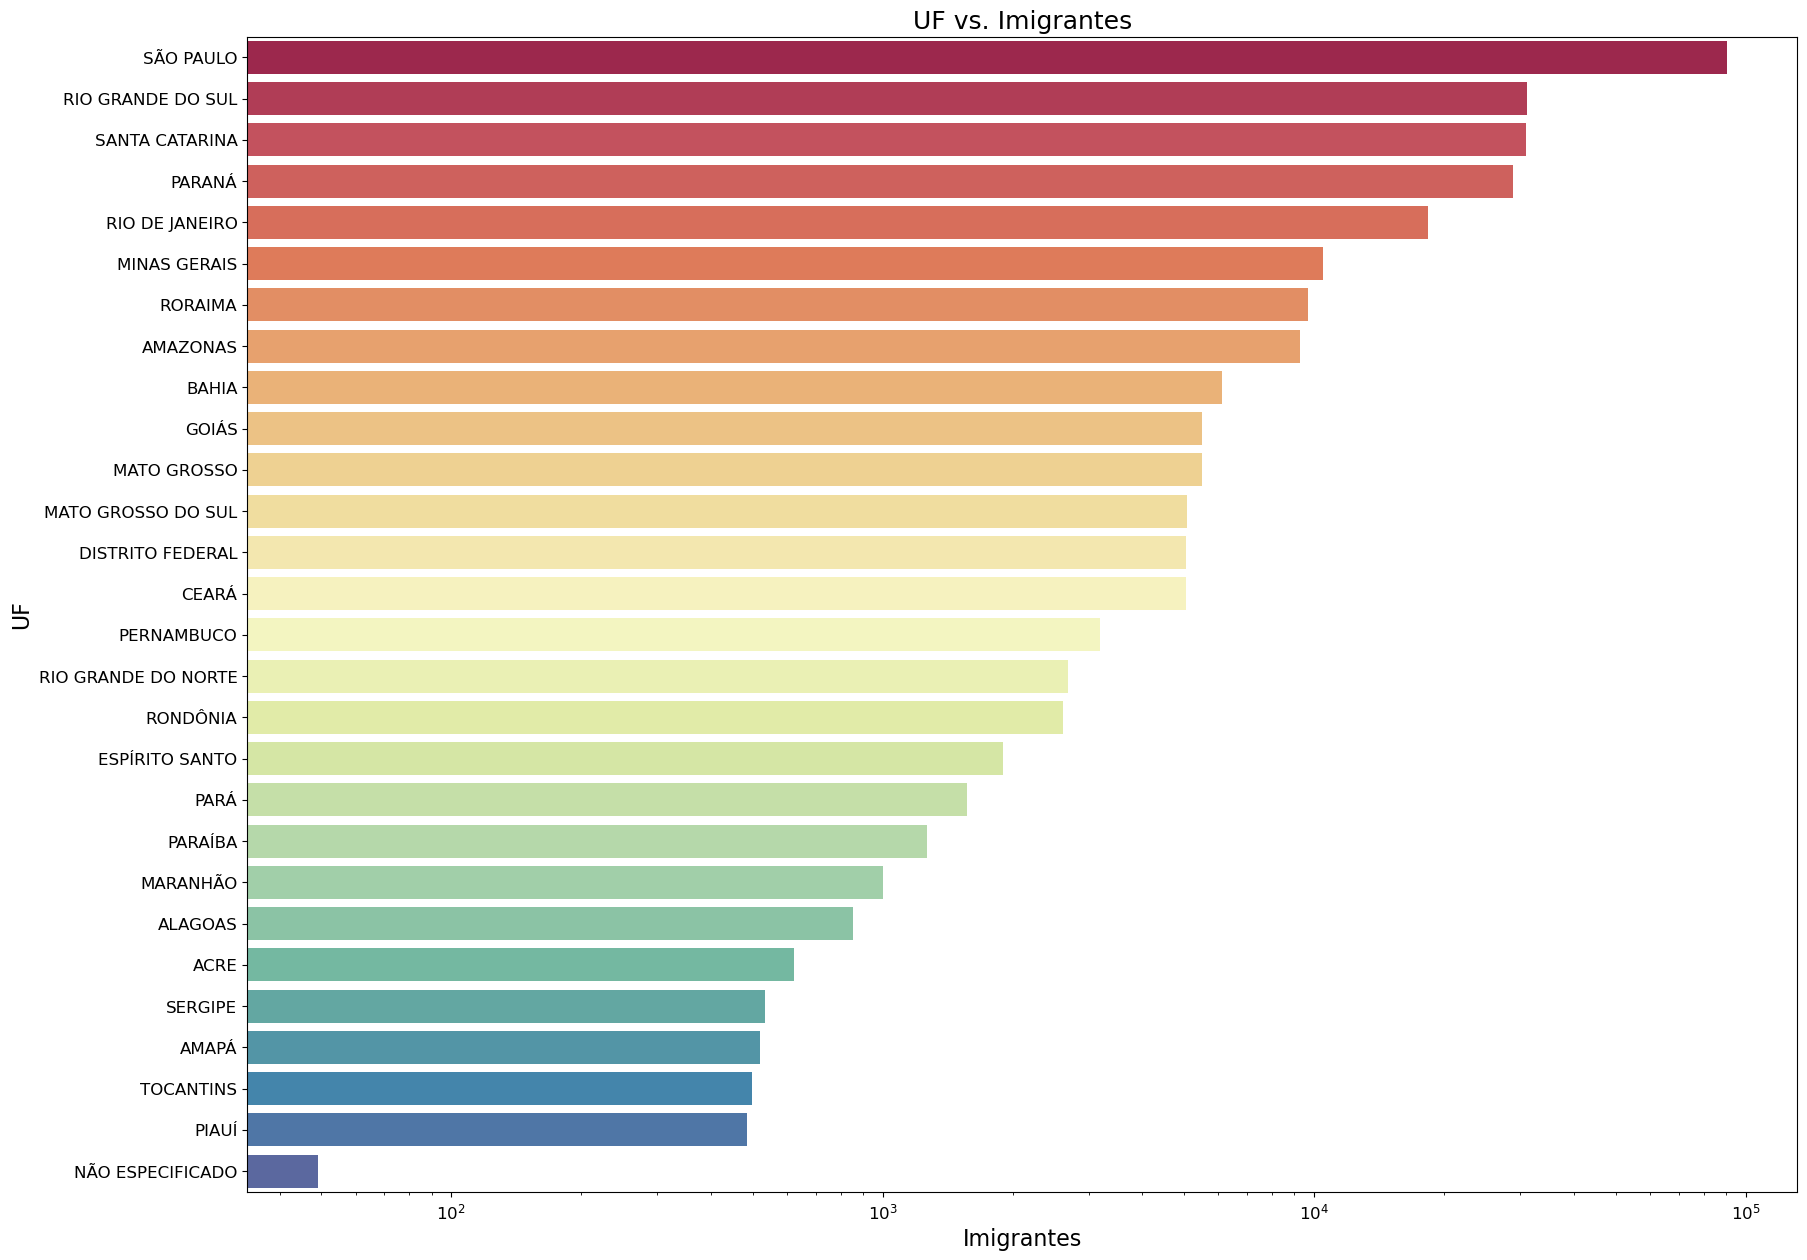

In [20]:
plt.figure(figsize=(20,15))
ax_log = sns.barplot(all_years_ufs,x='total',y='UF',palette="Spectral")
ax_log.axes.set_title("UF vs. Imigrantes",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("UF",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [21]:
list_ufs = list(all_years_ufs['UF'])
list_values = list(all_years_ufs['total'])
ufs_series = pd.Series(list_values, index=list_ufs)
ufs_series

SÃO PAULO              90436
RIO GRANDE DO SUL      31149
SANTA CATARINA         30929
PARANÁ                 28946
RIO DE JANEIRO         18317
MINAS GERAIS           10471
RORAIMA                 9690
AMAZONAS                9298
BAHIA                   6117
GOIÁS                   5502
MATO GROSSO             5486
MATO GROSSO DO SUL      5086
DISTRITO FEDERAL        5055
CEARÁ                   5048
PERNAMBUCO              3189
RIO GRANDE DO NORTE     2683
RONDÔNIA                2617
ESPÍRITO SANTO          1898
PARÁ                    1568
PARAÍBA                 1265
MARANHÃO                1001
ALAGOAS                  852
ACRE                     623
SERGIPE                  533
AMAPÁ                    520
TOCANTINS                498
PIAUÍ                    485
NÃO ESPECIFICADO          49
dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x232917ab730>,
 [Text(0.5783317522776453, 0.9356988748029295, 'SÃO PAULO'),
  Text(-0.7996993825492563, 0.7553018585640701, 'RIO GRANDE DO SUL'),
  Text(-1.0981103931287495, 0.0644481536013527, 'SANTA CATARINA'),
  Text(-0.8985584827053633, -0.6345018937388883, 'PARANÁ'),
  Text(-0.45291972487508936, -1.0024289116037475, 'RIO DE JANEIRO'),
  Text(-0.11044163311665002, -1.0944417050142632, 'MINAS GERAIS'),
  Text(0.1384441174242478, -1.0912530533064368, 'RORAIMA'),
  Text(0.36659037187574095, -1.0371169168652135, 'AMAZONAS'),
  Text(0.5400124126070374, -0.9583248897061617, 'BAHIA'),
  Text(0.6602914434964509, -0.8797813419511541, 'GOIÁS'),
  Text(0.763709995071148, -0.79167357125802, 'MATO GROSSO'),
  Text(0.8522334126513244, -0.6954841553627786, 'MATO GROSSO DO SUL'),
  Text(0.9258522511908228, -0.5939676834347856, 'DISTRITO FEDERAL'),
  Text(0.9872313181500733, -0.4851539183224938, 'CEARÁ'),
  Text(1.0278811574876539, -0.3917401256979442, 'PERNAMBUCO'),

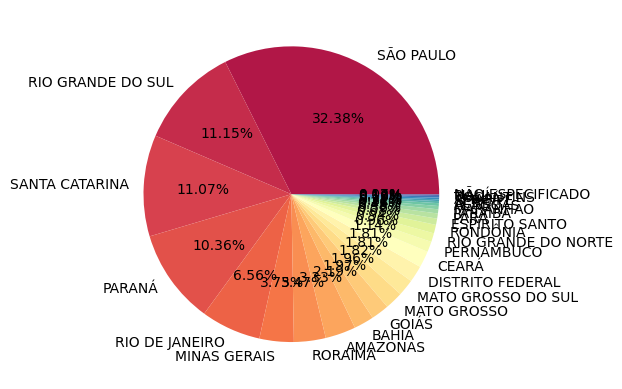

In [22]:
plt.pie(ufs_series, labels=ufs_series.index, colors=colors, autopct='%1.2f%%')

## Descrição estatística

In [23]:
all_years_ufs.describe()

,total
count,28.000000
mean,9975.392857
std,18249.701624
min,49.000000
25%,963.750000
50%,4118.500000
75%,9396.000000
max,90436.000000


## Gráfico em caixa (para mostrar outliers)

<Axes: >

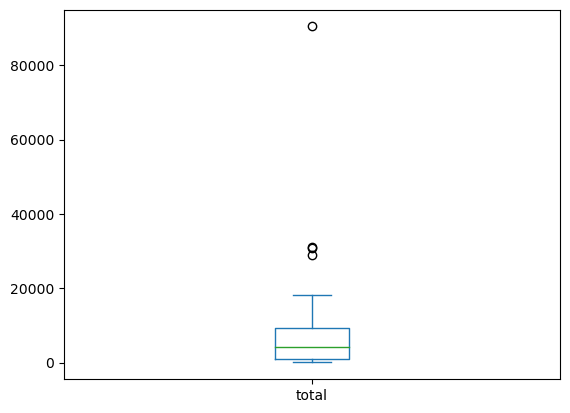

In [24]:
all_years_ufs.plot(kind="box")

# Dados gerais de cada continente (últimos 10 anos)

In [25]:
def per_continent(data):
    continents = []
    imigrantes = []
    for name in data['continente']:
        individual_df = data[data['continente'] == name]
        n_imigrantes = sum(individual_df['total'])
        individual_df = individual_df.drop_duplicates('continente')
        if name not in continents:
            continents.append(individual_df['continente'].values[0])
            imigrantes.append(n_imigrantes)
    new_df = pd.DataFrame({"continente":continents,
                           "total":imigrantes})
    return new_df

all_years_continents = per_continent(df)
all_years_continents = all_years_continents.sort_values(by='total',ascending=False,ignore_index=True)
all_years_continents

,continente,total
0,AMÉRICA CENTRAL E CARIBE,103526
1,AMÉRICA DO SUL,55928
2,EUROPA,44978
3,ÁSIA,41791
4,ÁFRICA,24407
5,AMÉRICA DO NORTE,7853
6,OCEANIA,752
7,NÃO ESPECIFICADO,76


## Gráfico de barras (escala logarítmica)

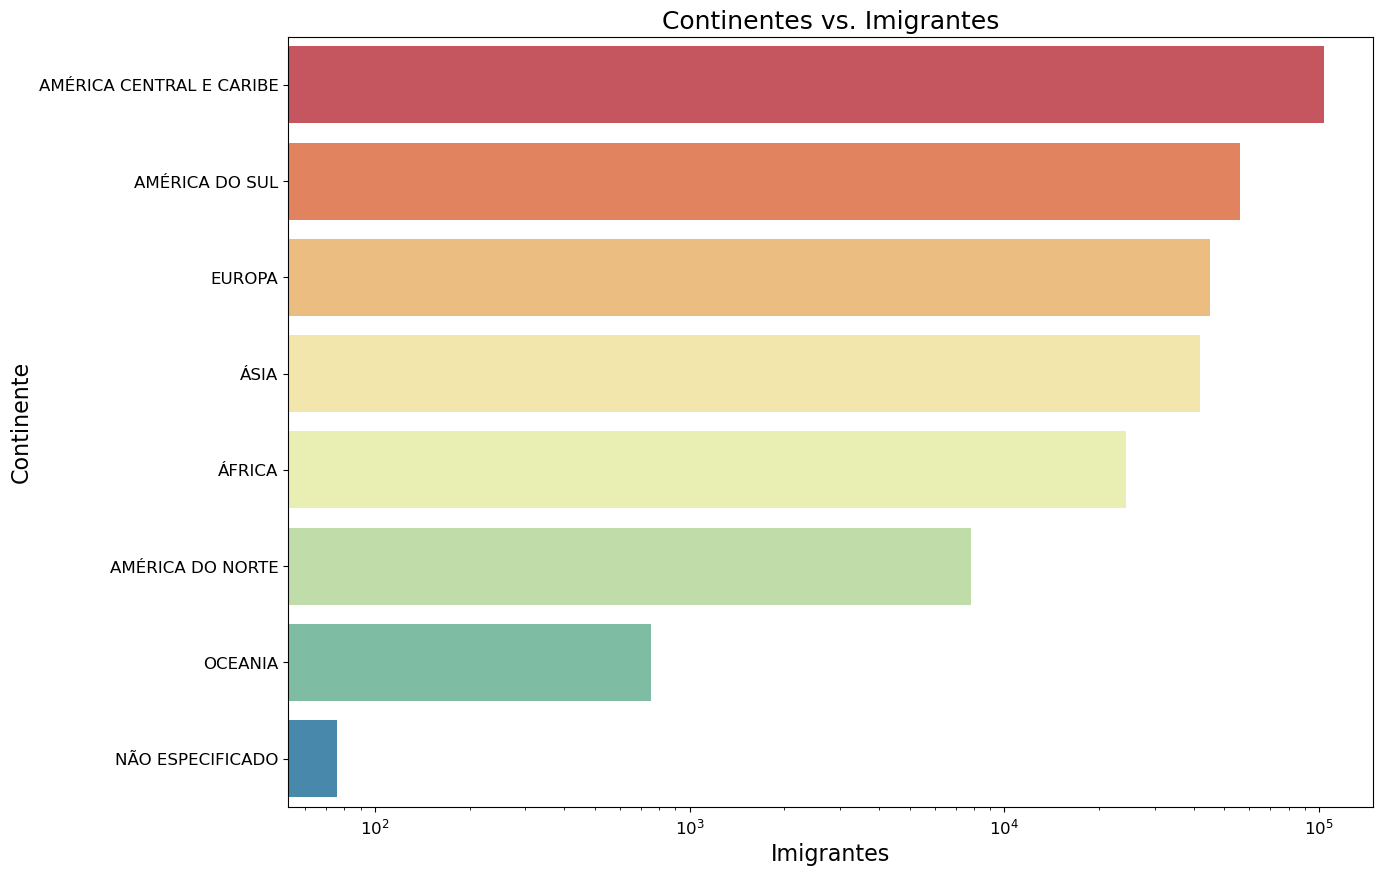

In [26]:
plt.figure(figsize=(14,10))
ax_log = sns.barplot(all_years_continents,x='total',y='continente',palette="Spectral")
ax_log.axes.set_title("Continentes vs. Imigrantes",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("Continente",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [27]:
list_continents = list(all_years_continents['continente'])
list_numbers = list(all_years_continents['total'])
continents_series = pd.Series(list_numbers, index=list_continents)
continents_series

AMÉRICA CENTRAL E CARIBE    103526
AMÉRICA DO SUL               55928
EUROPA                       44978
ÁSIA                         41791
ÁFRICA                       24407
AMÉRICA DO NORTE              7853
OCEANIA                        752
NÃO ESPECIFICADO                76
dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x232916c8370>,
 [Text(0.434807390345994, 1.0104170096056908, 'AMÉRICA CENTRAL E CARIBE'),
  Text(-1.0814949205679762, 0.20091972721877427, 'AMÉRICA DO SUL'),
  Text(-0.638714588016443, -0.8955689113937495, 'EUROPA'),
  Text(0.3838147061337489, -1.0308667573238863, 'ÁSIA'),
  Text(0.9808231168989359, -0.49798194079369645, 'ÁFRICA'),
  Text(1.093714456262044, -0.11742524500047487, 'AMÉRICA DO NORTE'),
  Text(1.0999431372076012, -0.011184583581900475, 'OCEANIA'),
  Text(1.0999995980085882, -0.000940415304377055, 'NÃO ESPECIFICADO')],
 [Text(0.23716766746145126, 0.551136550694013, '37.06%'),
  Text(-0.5899063203098052, 0.10959257848296777, '20.02%'),
  Text(-0.3483897752816962, -0.48849213348749965, '16.10%'),
  Text(0.20935347607295393, -0.5622909585403015, '14.96%'),
  Text(0.5349944273994195, -0.27162651316019804, '8.74%'),
  Text(0.5965715215974785, -0.06405013363662265, '2.81%'),
  Text(0.5999689839314187, -0.006100681953763895, '0.27%'),
  Text(0.59999

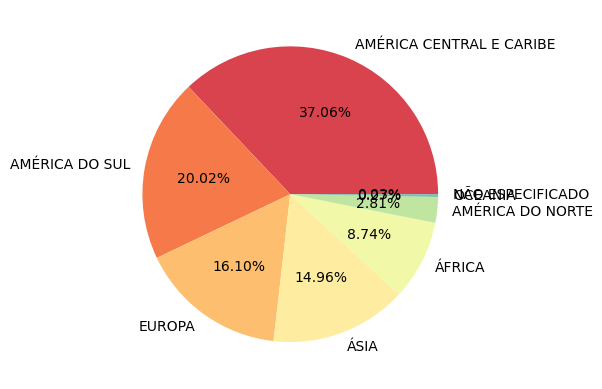

In [28]:
plt.pie(continents_series, labels=continents_series.index,
        colors=sns.color_palette("Spectral",n_colors=8), autopct='%1.2f%%')

## Descrição estatística

In [29]:
all_years_continents.describe()

,total
count,8.000000
mean,34913.875000
std,34890.021543
min,76.000000
25%,6077.750000
50%,33099.000000
75%,47715.500000
max,103526.000000


# Dados dos últimos 5 anos

In [30]:
last_5 = df[df['ano_entrada'] >= 2018]
last_5

,ano_entrada,UF,país,continente,município,status,gênero,total
7141,2018,ACRE,MARROCOS,ÁFRICA,NaN,RESIDENTE,NaN,1
7142,2018,ALAGOAS,ANGOLA,ÁFRICA,NaN,RESIDENTE,NaN,1
7143,2018,ALAGOAS,EGITO,ÁFRICA,NaN,RESIDENTE,NaN,1
7144,2018,ALAGOAS,SENEGAL,ÁFRICA,NaN,RESIDENTE,NaN,1
7145,2018,ALAGOAS,TUNÍSIA,ÁFRICA,NaN,RESIDENTE,NaN,1
...,...,...,...,...,...,...,...,...
12781,2022,RIO DE JANEIRO,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12782,2022,RIO GRANDE DO SUL,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12783,2022,SANTA CATARINA,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12784,2022,SÃO PAULO,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,15


## Total de imigrantes:

In [31]:
sum(last_5['total'])

82583

## Dados de cada país

In [32]:
last_5_countries = per_country(last_5)
last_5_countries = last_5_countries.sort_values(by='total',
                                                ascending=False,
                                                ignore_index=True)
last_5_countries

,país,total
0,VENEZUELA,16691
1,URUGUAI,10880
2,HAITI,6503
3,ARGENTINA,5987
4,CHINA,3308
...,...,...
168,LAOS,1
169,BAREIN,1
170,PAPUA-NOVA GUINÉ,1
171,UNIÃO SOVIÉTICA,1


In [33]:
last_5_top_50 = last_5_countries.head(50)
last_5_top_50

,país,total
0,VENEZUELA,16691
1,URUGUAI,10880
2,HAITI,6503
3,ARGENTINA,5987
4,CHINA,3308
5,CUBA,3077
6,PORTUGAL,2046
7,ESTADOS UNIDOS,2017
8,ITÁLIA,1713
9,FRANÇA,1701


## Gráfico de barras (escala logarítmica)

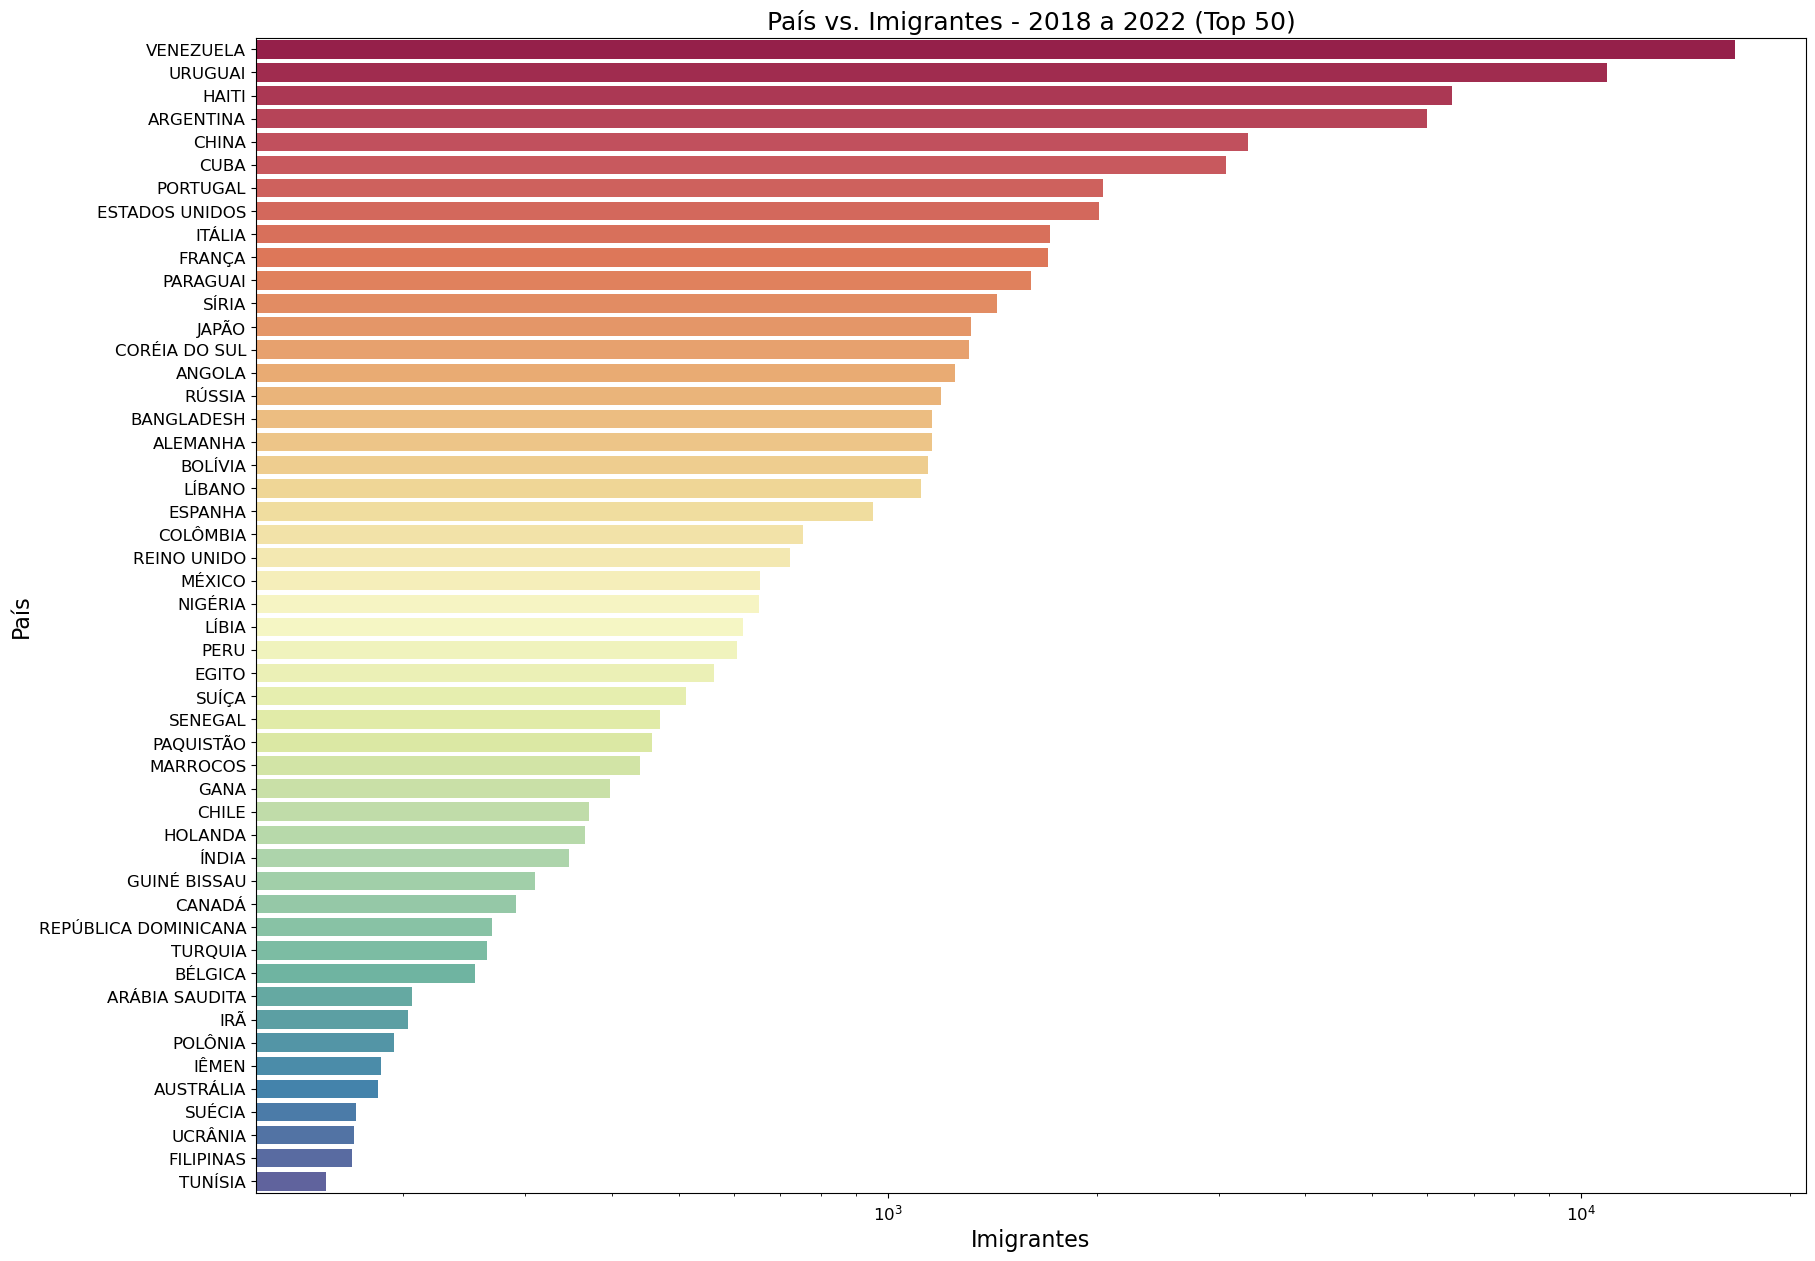

In [34]:
plt.figure(figsize=(20,15))
ax_log = sns.barplot(last_5_top_50,x='total',y='país',palette="Spectral")
ax_log.axes.set_title("País vs. Imigrantes - 2018 a 2022 (Top 50)",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("País",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [35]:
list_last_5_countries = list(last_5_countries['país'])
list_last_5_totals = list(last_5_countries['total'])
last_5_countries_series = pd.Series(list_last_5_totals, index=list_last_5_countries)
last_5_countries_series

VENEZUELA           16691
URUGUAI             10880
HAITI                6503
ARGENTINA            5987
CHINA                3308
                    ...  
LAOS                    1
BAREIN                  1
PAPUA-NOVA GUINÉ        1
UNIÃO SOVIÉTICA         1
CHADE                   1
Length: 173, dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x23290fbde50>,
 [Text(0.8856095461868011, 0.6524536241778479, 'VENEZUELA'),
  Text(-0.12403856037214926, 1.0929841881476625, 'URUGUAI'),
  Text(-0.7691220559175455, 0.78641672356402, 'HAITI'),
  Text(-1.043681934082295, 0.34745937959744394, 'ARGENTINA'),
  Text(-1.099429032385104, -0.035437307301123946, 'CHINA'),
  Text(-1.058632707812152, -0.2988256848905577, 'CUBA'),
  Text(-0.9807228749005478, -0.4981793277995432, 'PORTUGAL'),
  Text(-0.8923375944220637, -0.6432212819714881, 'ESTADOS UNIDOS'),
  Text(-0.7924052532943942, -0.7629507943186423, 'ITÁLIA'),
  Text(-0.6869225047238456, -0.8591492725387821, 'FRANÇA'),
  Text(-0.5735517520971126, -0.9386364512772409, 'PARAGUAI'),
  Text(-0.46110843406427093, -0.9986886461929945, 'SÍRIA'),
  Text(-0.3540629455806864, -1.0414602395515289, 'JAPÃO'),
  Text(-0.24830928663735852, -1.071607436596838, 'CORÉIA DO SUL'),
  Text(-0.1428544179154326, -1.0906844710006847, 'ANGOLA'),
  Text(-0.04097842405715066, -1.099236

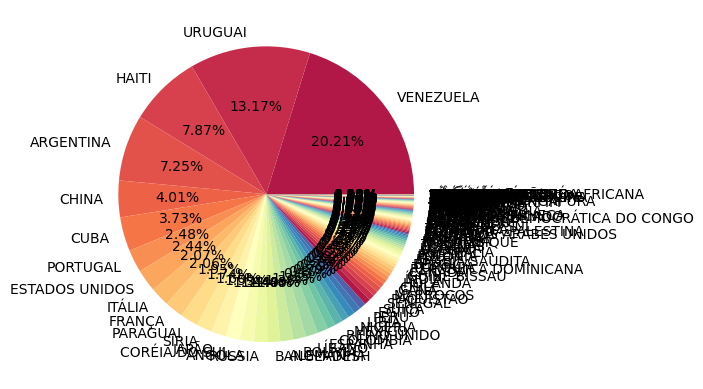

In [36]:
plt.pie(last_5_countries_series, labels=last_5_countries_series.index, colors=colors,
        autopct='%1.2f%%')

## Descrição estatística

In [37]:
last_5_countries.describe()

,total
count,173.000000
mean,477.358382
std,1692.730407
min,1.000000
25%,8.000000
50%,47.000000
75%,194.000000
max,16691.000000


## Dados de cada Unidade da Federação

In [38]:
last_5_ufs = per_uf(last_5)
last_5_ufs = last_5_ufs.sort_values(by='total',ascending=False,
                                    ignore_index=True)
last_5_ufs

,UF,total
0,SÃO PAULO,21218
1,RIO GRANDE DO SUL,12525
2,RORAIMA,7030
3,PARANÁ,6844
4,SANTA CATARINA,6346
5,RIO DE JANEIRO,5724
6,AMAZONAS,4877
7,MINAS GERAIS,2391
8,BAHIA,2238
9,MATO GROSSO DO SUL,1740


## Gráfico de barras (escala logarítmica)

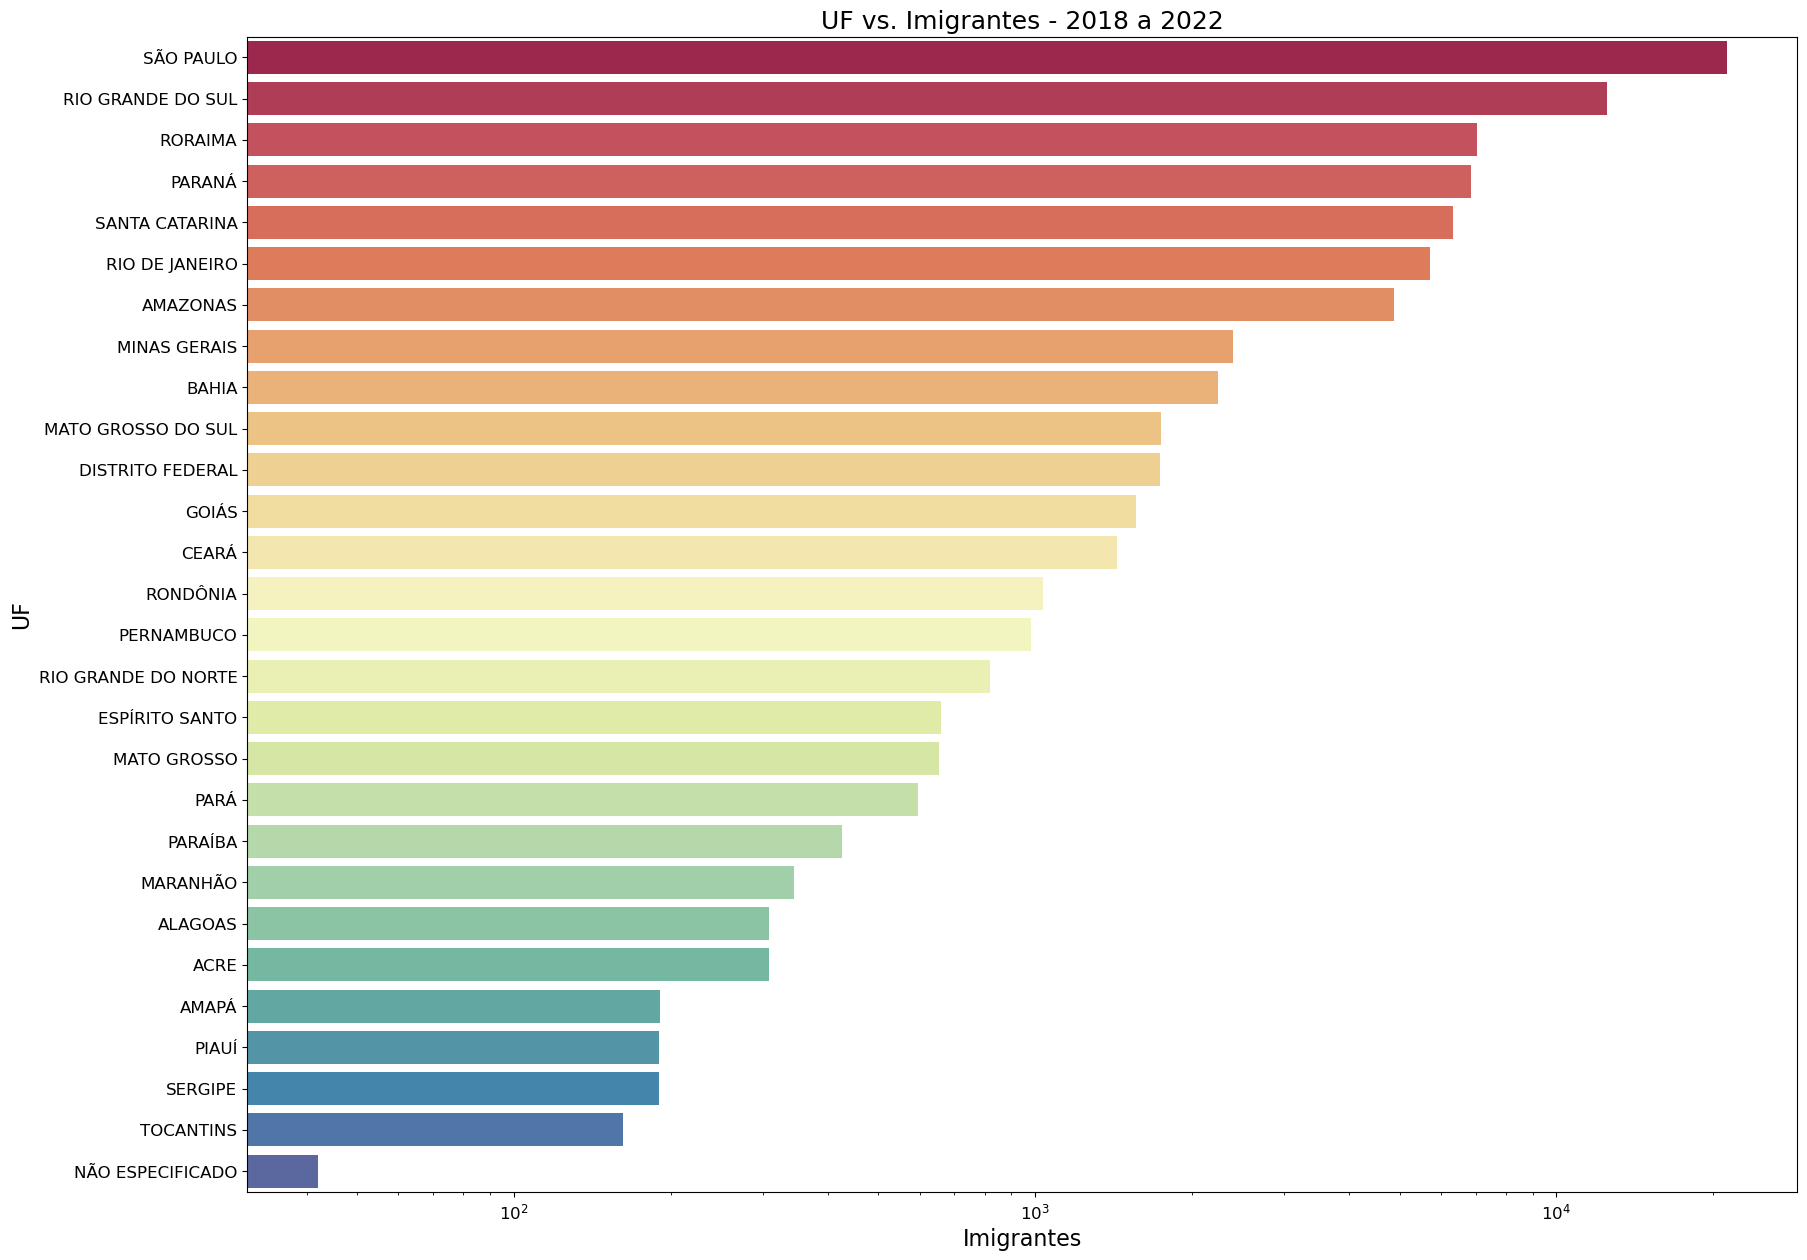

In [39]:
plt.figure(figsize=(20,15))
ax_log = sns.barplot(last_5_ufs,x='total',y='UF',palette="Spectral")
ax_log.axes.set_title("UF vs. Imigrantes - 2018 a 2022",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("UF",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [40]:
list_last_5_ufs = list(last_5_ufs['UF'])
list_last_5_values = list(last_5_ufs['total'])
last_5_ufs_series = pd.Series(list_last_5_values, index=list_last_5_ufs)
last_5_ufs_series

SÃO PAULO              21218
RIO GRANDE DO SUL      12525
RORAIMA                 7030
PARANÁ                  6844
SANTA CATARINA          6346
RIO DE JANEIRO          5724
AMAZONAS                4877
MINAS GERAIS            2391
BAHIA                   2238
MATO GROSSO DO SUL      1740
DISTRITO FEDERAL        1735
GOIÁS                   1564
CEARÁ                   1438
RONDÔNIA                1036
PERNAMBUCO               983
RIO GRANDE DO NORTE      820
ESPÍRITO SANTO           660
MATO GROSSO              655
PARÁ                     597
PARAÍBA                  425
MARANHÃO                 345
ALAGOAS                  309
ACRE                     308
AMAPÁ                    191
PIAUÍ                    190
SERGIPE                  190
TOCANTINS                162
NÃO ESPECIFICADO          42
dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x23295513d60>,
 [Text(0.7607019221510325, 0.7945643999297507, 'SÃO PAULO'),
  Text(-0.5465779057558646, 0.9545955127380042, 'RIO GRANDE DO SUL'),
  Text(-1.0486081731330745, 0.3322964026866918, 'RORAIMA'),
  Text(-1.073268817128715, -0.24102706524191247, 'PARANÁ'),
  Text(-0.82504159007368, -0.727534449114744, 'SANTA CATARINA'),
  Text(-0.4171455314331913, -1.0178357458869878, 'RIO DE JANEIRO'),
  Text(0.015754501542401163, -1.0998871740688454, 'AMAZONAS'),
  Text(0.3154005017109457, -1.0538133247973684, 'MINAS GERAIS'),
  Text(0.495136342147656, -0.982262695354272, 'BAHIA'),
  Text(0.6375564377548925, -0.8963937687630877, 'MATO GROSSO DO SUL'),
  Text(0.7501474200054717, -0.8045364182304829, 'DISTRITO FEDERAL'),
  Text(0.844951698163313, -0.7043128763347536, 'GOIÁS'),
  Text(0.9197063266081269, -0.6034403639109548, 'CEARÁ'),
  Text(0.9723451160993035, -0.5143393580097017, 'RONDÔNIA'),
  Text(1.0089440654019235, -0.4382144142885301, 'PERNAMBUCO'),
  Text

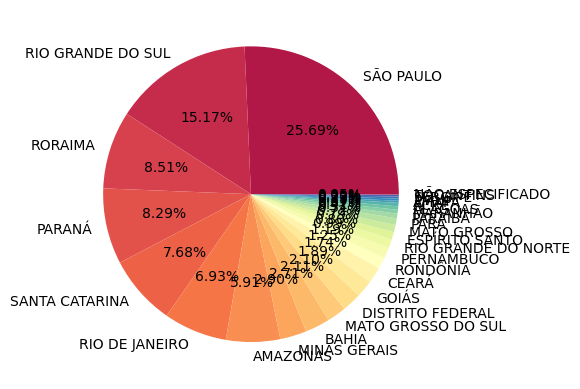

In [41]:
plt.pie(last_5_ufs_series, labels=last_5_ufs_series.index,
        colors=colors, autopct='%1.2f%%')

## Descrição Estatística

In [42]:
last_5_ufs.describe()

,total
count,28.000000
mean,2949.392857
std,4644.505670
min,42.000000
25%,336.000000
50%,1009.500000
75%,3012.500000
max,21218.000000


## Gráfico em caixa (para mostrar outliers)

<Axes: >

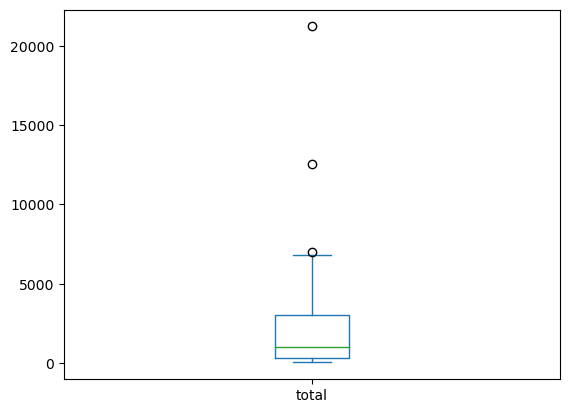

In [43]:
last_5_ufs.plot(kind="box")

## Dados de cada continente

In [44]:
last_5_continents = per_continent(last_5)
last_5_continents = last_5_continents.sort_values(by='total',
                                                  ascending=False,
                                                  ignore_index=True)
last_5_continents

,continente,total
0,AMÉRICA DO SUL,38249
1,EUROPA,12655
2,ÁSIA,12113
3,AMÉRICA CENTRAL E CARIBE,10230
4,ÁFRICA,6066
5,AMÉRICA DO NORTE,2963
6,OCEANIA,244
7,NÃO ESPECIFICADO,63


## Gráfico de barras (escala logarítmica)

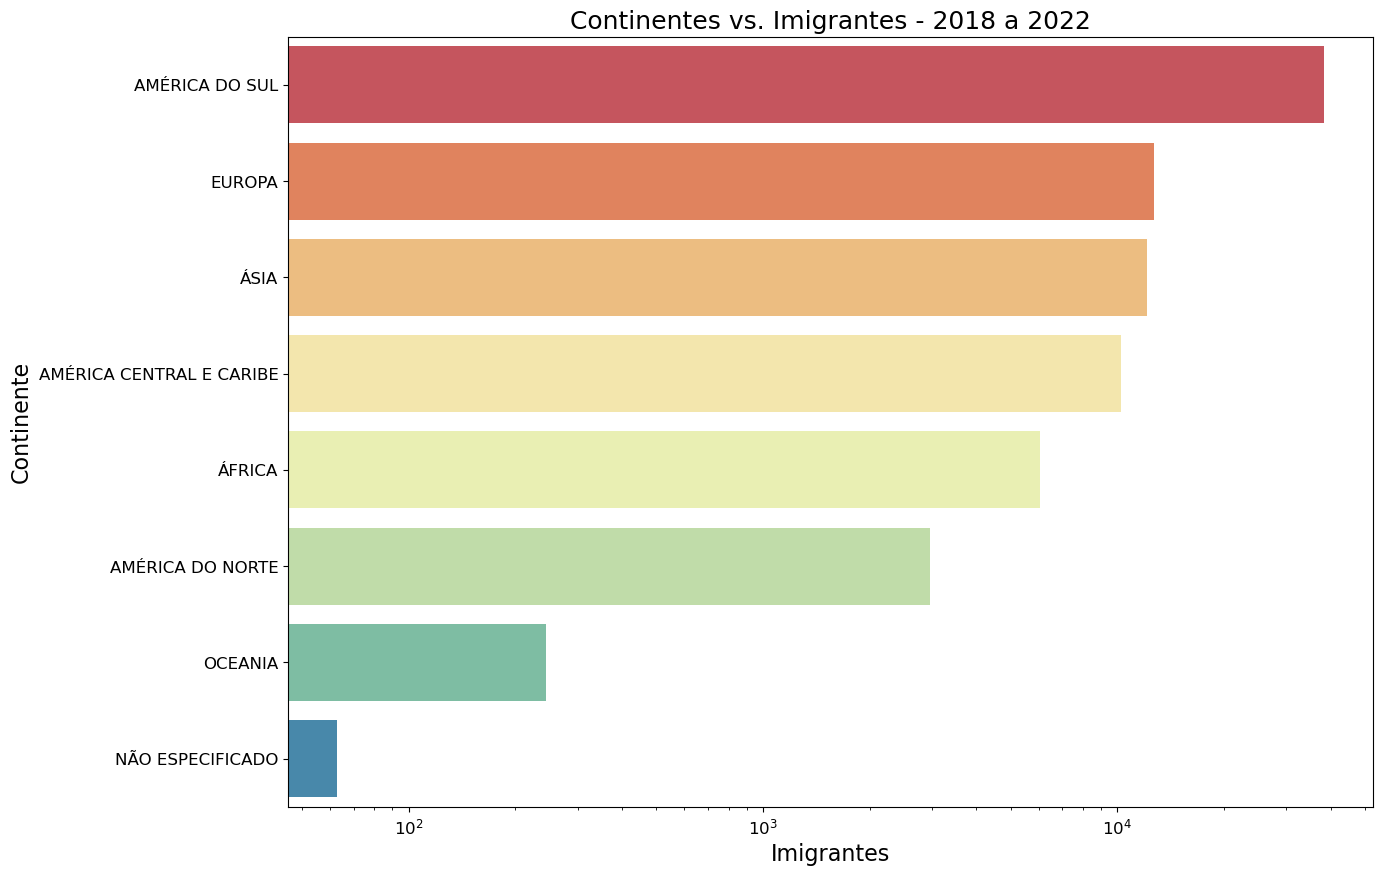

In [45]:
plt.figure(figsize=(14,10))
ax_log = sns.barplot(last_5_continents,x='total',y='continente',palette="Spectral")
ax_log.axes.set_title("Continentes vs. Imigrantes - 2018 a 2022",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("Continente",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [46]:
list_last_5_continents = list(last_5_continents['continente'])
list_last_5_numbers = list(last_5_continents['total'])
last_5_continents_series = pd.Series(list_last_5_numbers, index=list_last_5_continents)
last_5_continents_series

AMÉRICA DO SUL              38249
EUROPA                      12655
ÁSIA                        12113
AMÉRICA CENTRAL E CARIBE    10230
ÁFRICA                       6066
AMÉRICA DO NORTE             2963
OCEANIA                       244
NÃO ESPECIFICADO               63
dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x232920372b0>,
 [Text(0.12703177937656593, 1.092640346604693, 'AMÉRICA DO SUL'),
  Text(-1.0658217359611584, -0.27207356937553295, 'EUROPA'),
  Text(-0.4066304589624515, -1.0220820269645614, 'ÁSIA'),
  Text(0.4994659832322871, -0.9800682280299698, 'AMÉRICA CENTRAL E CARIBE'),
  Text(0.9759214238408255, -0.5075208118772039, 'ÁFRICA'),
  Text(1.089831688678602, -0.14922094474954645, 'AMÉRICA DO NORTE'),
  Text(1.0998910371651278, -0.015482453417320763, 'OCEANIA'),
  Text(1.0999968408666942, -0.0026363010625722275, 'NÃO ESPECIFICADO')],
 [Text(0.06929006147812687, 0.5959856436025598, '46.32%'),
  Text(-0.5813573105242682, -0.14840376511392706, '15.32%'),
  Text(-0.22179843216133716, -0.5574992874352153, '14.67%'),
  Text(0.27243599085397474, -0.534582669834529, '12.39%'),
  Text(0.5323207766404502, -0.27682953375120206, '7.35%'),
  Text(0.5944536483701464, -0.08139324259066169, '3.59%'),
  Text(0.5999405657264333, -0.00844497459126587, '0.30%'),
  Text(0.59

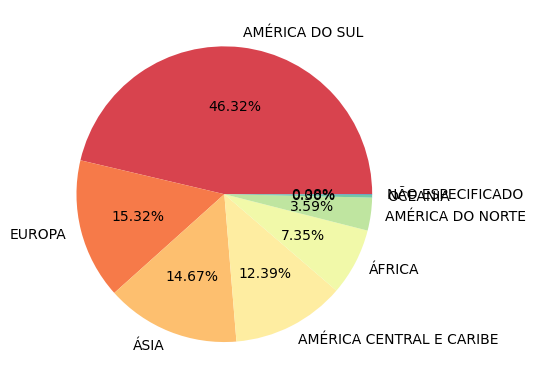

In [47]:
plt.pie(last_5_continents_series, labels=last_5_continents_series.index,
        colors=sns.color_palette("Spectral",n_colors=8), autopct='%1.2f%%')

## Descrição estatística

In [48]:
last_5_continents.describe()

,total
count,8.000000
mean,10322.875000
std,12350.002538
min,63.000000
25%,2283.250000
50%,8148.000000
75%,12248.500000
max,38249.000000


# Dados de 2022

In [49]:
k22 = df[df['ano_entrada'] == 2022]
k22

,ano_entrada,UF,país,continente,município,status,gênero,total
11704,2022,ALAGOAS,ANGOLA,ÁFRICA,NaN,RESIDENTE,NaN,1
11705,2022,ALAGOAS,ARGÉLIA,ÁFRICA,NaN,RESIDENTE,NaN,1
11706,2022,ALAGOAS,EGITO,ÁFRICA,NaN,RESIDENTE,NaN,1
11707,2022,ALAGOAS,TUNÍSIA,ÁFRICA,NaN,RESIDENTE,NaN,1
11708,2022,AMAPÁ,CHADE,ÁFRICA,NaN,RESIDENTE,NaN,1
...,...,...,...,...,...,...,...,...
12781,2022,RIO DE JANEIRO,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12782,2022,RIO GRANDE DO SUL,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12783,2022,SANTA CATARINA,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,3
12784,2022,SÃO PAULO,AUSTRÁLIA,OCEANIA,NaN,RESIDENTE,NaN,15


## Dados de cada país

In [50]:
k22_countries = per_country(k22)
k22_countries = k22_countries.sort_values(by='total', ascending=False,
                                          ignore_index=True)
k22_countries

,país,total
0,ARGENTINA,4363
1,URUGUAI,1393
2,CUBA,949
3,RÚSSIA,418
4,PARAGUAI,391
...,...,...
140,ETIÓPIA,1
141,REPÚBLICA CENTRO AFRICANA,1
142,SOMÁLIA,1
143,BAHAMAS,1


In [51]:
k22_top_50 = k22_countries.head(50)
k22_top_50

,país,total
0,ARGENTINA,4363
1,URUGUAI,1393
2,CUBA,949
3,RÚSSIA,418
4,PARAGUAI,391
5,PORTUGAL,375
6,ESTADOS UNIDOS,340
7,SENEGAL,325
8,BANGLADESH,318
9,HAITI,314


## Gráfico de barras (escala logarítmica)

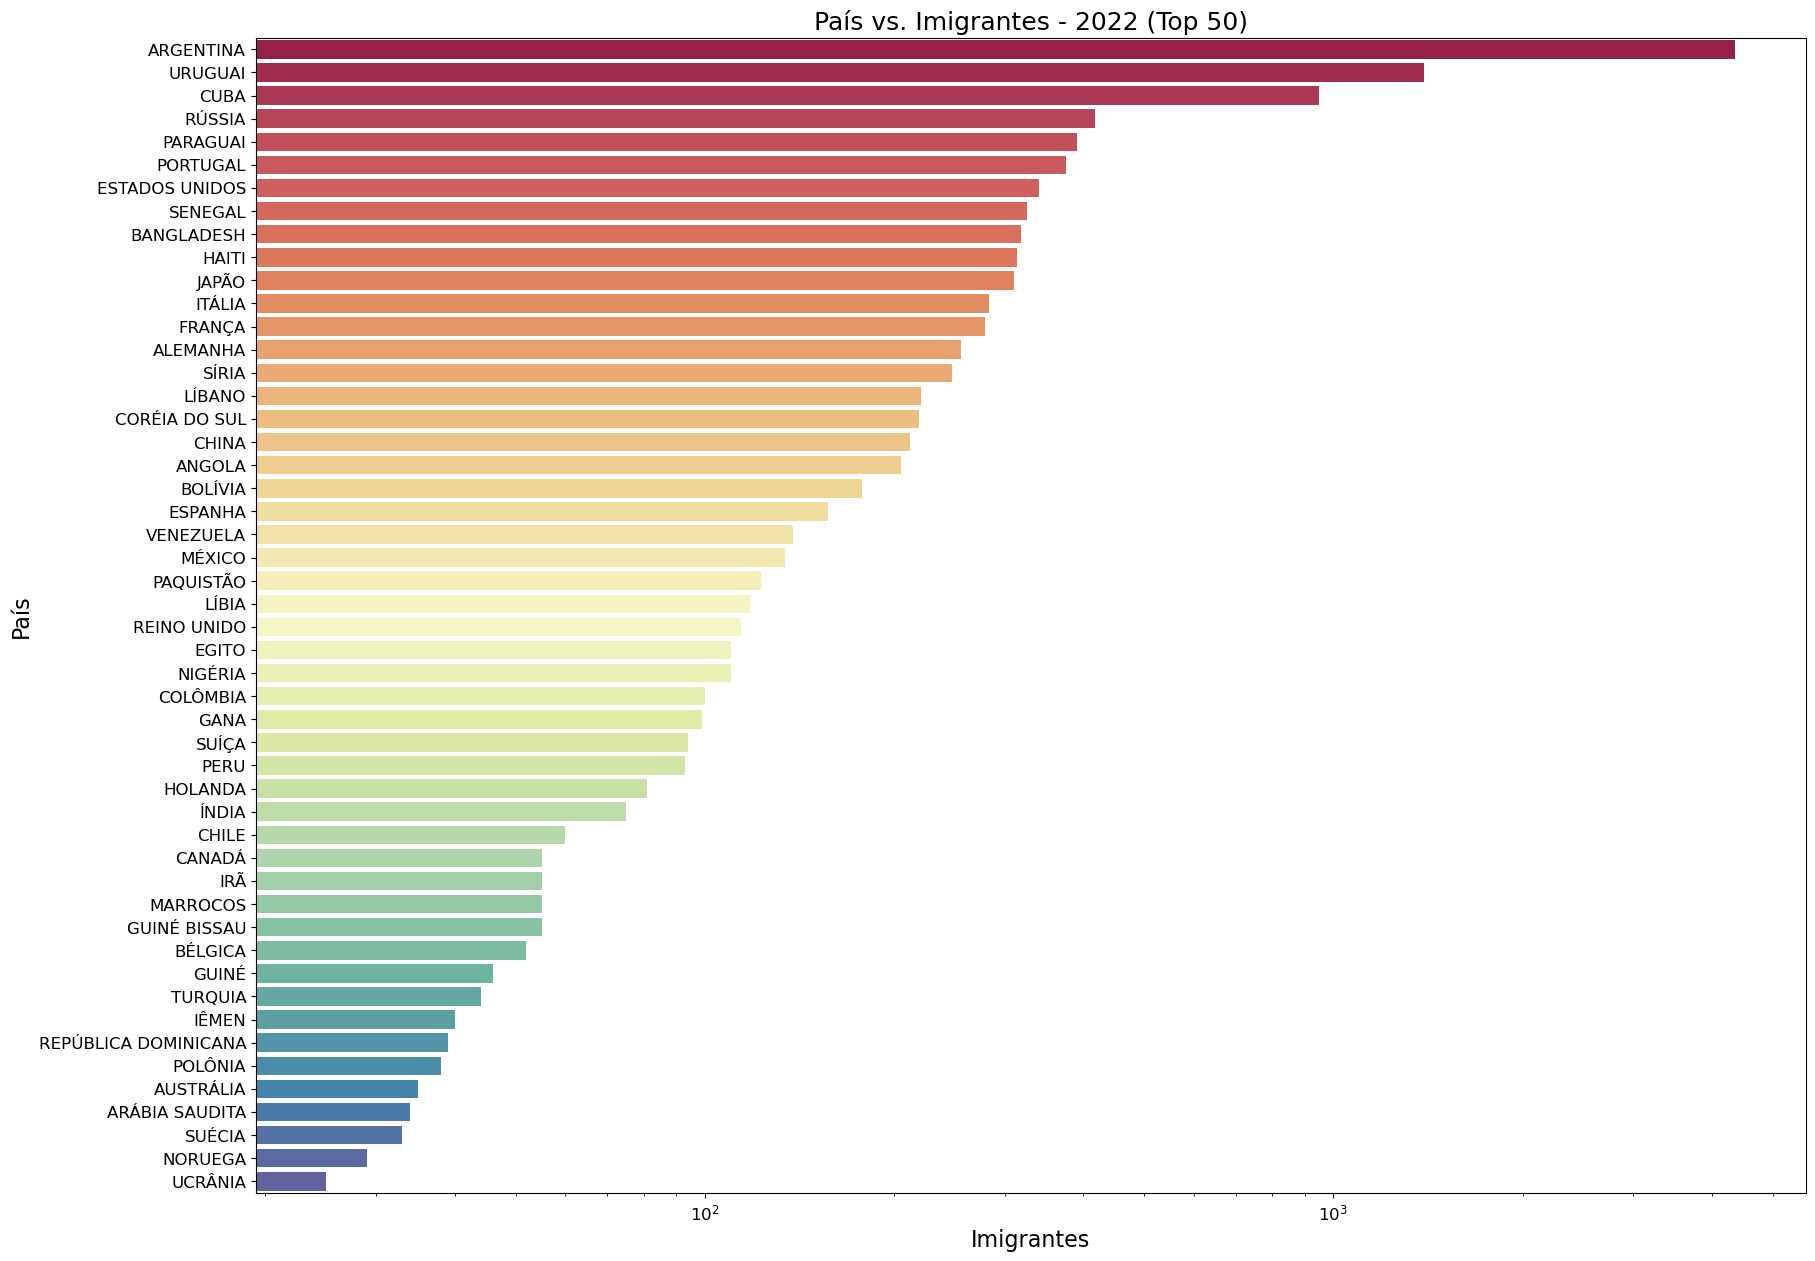

In [52]:
plt.figure(figsize=(20,15))
ax_log = sns.barplot(k22_top_50,x='total',y='país',palette="Spectral")
ax_log.axes.set_title("País vs. Imigrantes - 2022 (Top 50)",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("País",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [53]:
list_k22_countries = list(k22_countries['país'])
list_k22_totals = list(k22_countries['total'])
k22_countries_series = pd.Series(list_k22_totals, index=list_k22_countries)
k22_countries_series

ARGENTINA                    4363
URUGUAI                      1393
CUBA                          949
RÚSSIA                        418
PARAGUAI                      391
                             ... 
ETIÓPIA                         1
REPÚBLICA CENTRO AFRICANA       1
SOMÁLIA                         1
BAHAMAS                         1
SAMOA                           1
Length: 145, dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x232953fb670>,
 [Text(0.6457360952564677, 0.8905194525011401, 'ARGENTINA'),
  Text(-0.6366526616815251, 0.8970358902373023, 'URUGUAI'),
  Text(-0.9918457528388439, 0.47564903298077577, 'CUBA'),
  Text(-1.087387652085823, 0.1660966408187752, 'RÚSSIA'),
  Text(-1.0997000733606674, -0.025685572809321044, 'PARAGUAI'),
  Text(-1.0804151407602705, -0.20664734117806893, 'PORTUGAL'),
  Text(-1.0357072712063906, -0.3705542448417129, 'ESTADOS UNIDOS'),
  Text(-0.9719189988101569, -0.5151441155170684, 'SENEGAL'),
  Text(-0.8911474367864188, -0.6448691696065146, 'BANGLADESH'),
  Text(-0.7949875362273459, -0.7602597038138841, 'HAITI'),
  Text(-0.6854934510740324, -0.8602899095854917, 'JAPÃO'),
  Text(-0.5698582757535209, -0.9408833857366302, 'ITÁLIA'),
  Text(-0.45160015407765175, -1.0030240778949633, 'FRANÇA'),
  Text(-0.33280798594827915, -1.048445918724018, 'ALEMANHA'),
  Text(-0.2170337777857934, -1.0783767149285204, 'SÍRIA'),
  Text(-0.1069830492978865, -1.09478

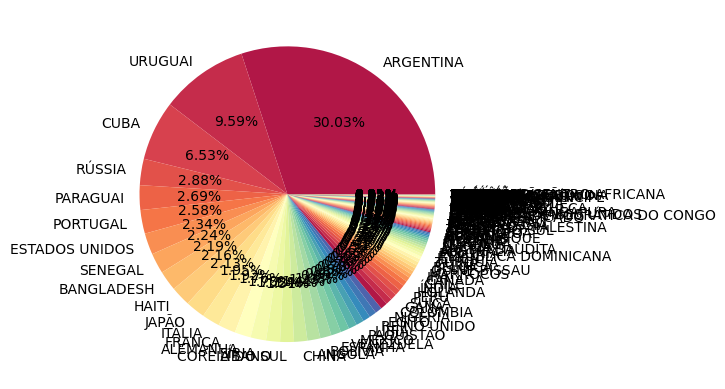

In [54]:
plt.pie(k22_countries_series, labels=k22_countries_series.index, colors=colors,
        autopct='%1.2f%%')

## Descrição estatística

In [55]:
k22_countries.describe()

,total
count,145.000000
mean,100.200000
std,391.968494
min,1.000000
25%,4.000000
50%,12.000000
75%,55.000000
max,4363.000000


## Dados de cada Unidade da Federação

In [56]:
k22_ufs = per_uf(k22)
k22_ufs = k22_ufs.sort_values(by='total', ascending=False,
                              ignore_index=True)
k22_ufs

,UF,total
0,SÃO PAULO,3825
1,SANTA CATARINA,2093
2,RIO GRANDE DO SUL,1842
3,RIO DE JANEIRO,1581
4,PARANÁ,1379
5,BAHIA,542
6,MINAS GERAIS,484
7,DISTRITO FEDERAL,405
8,CEARÁ,346
9,RIO GRANDE DO NORTE,278


## Gráfico de barras (escala logarítmica)

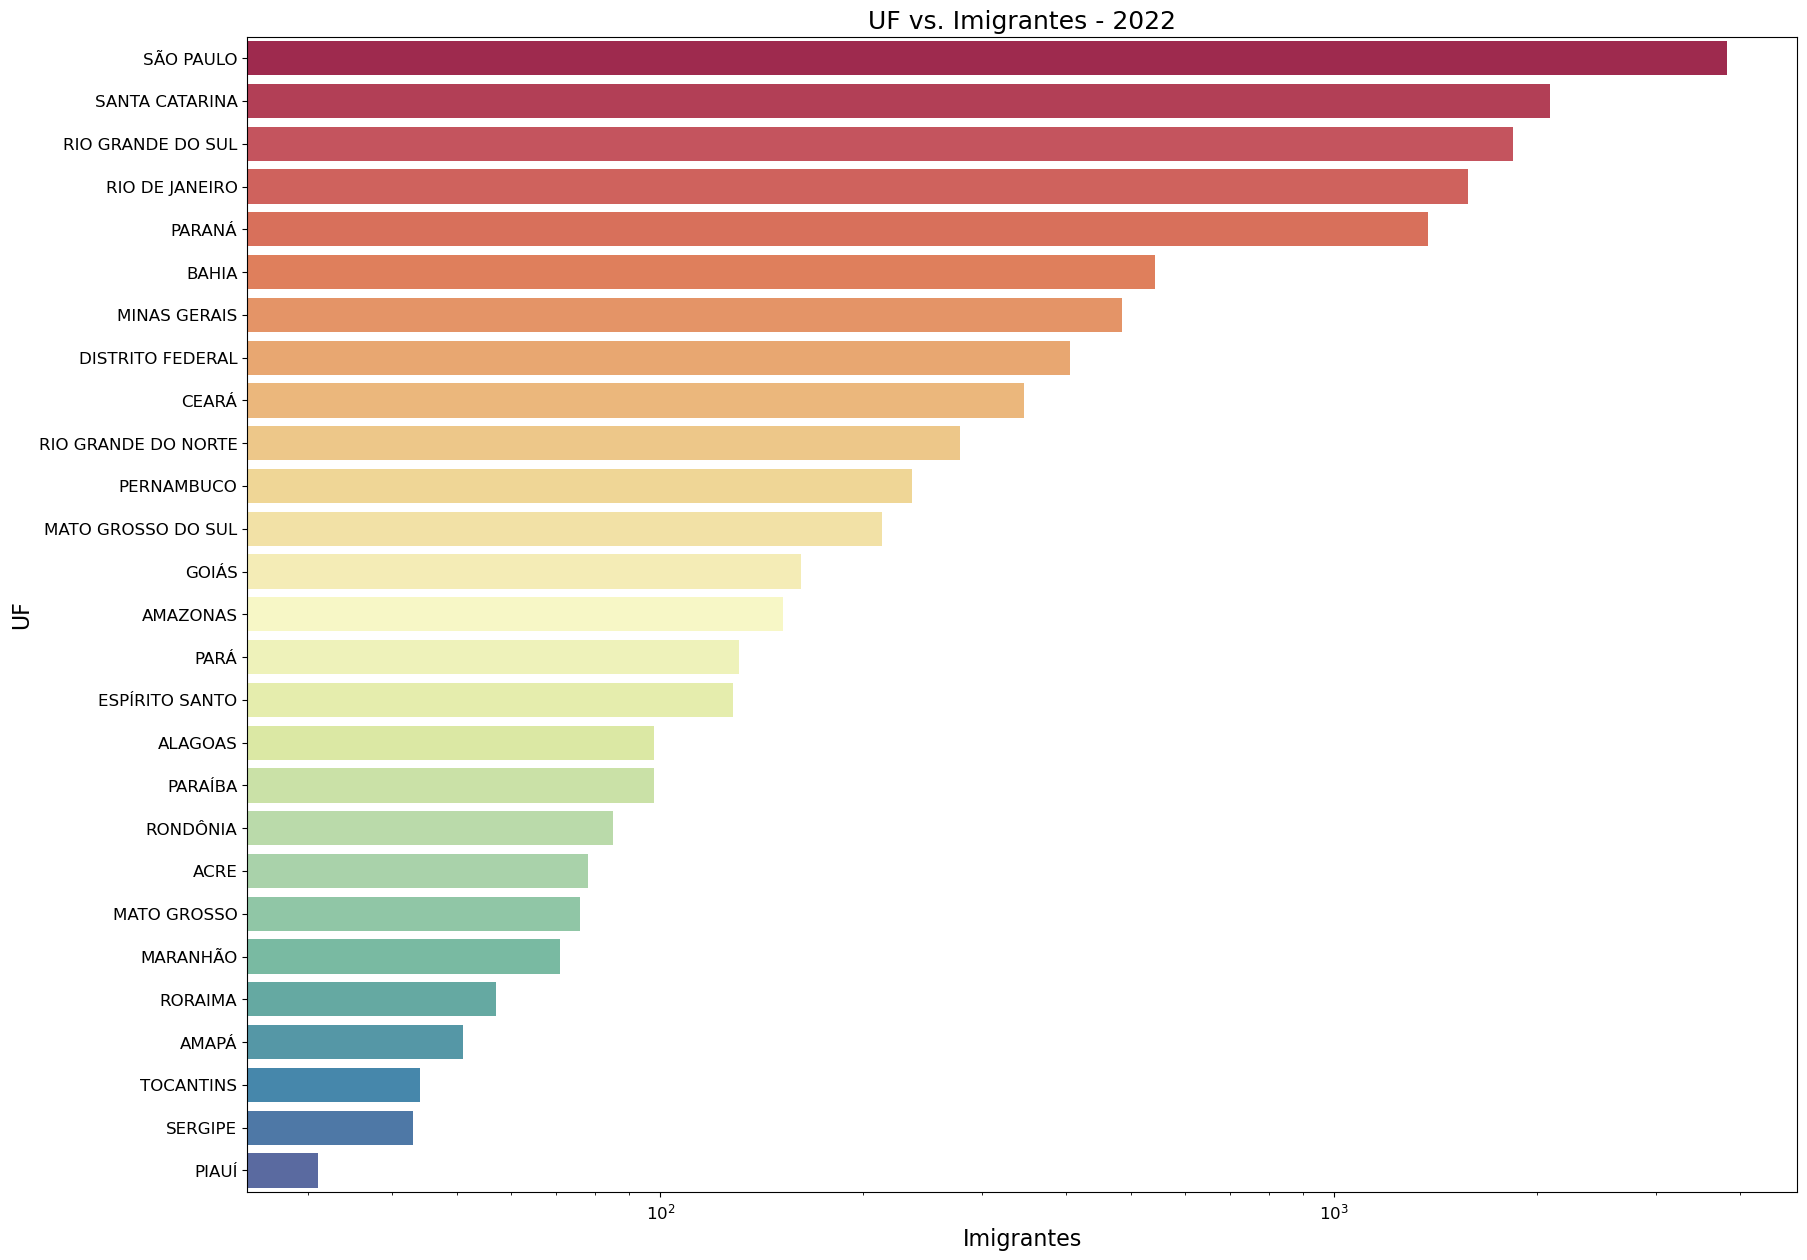

In [57]:
plt.figure(figsize=(20,15))
ax_log = sns.barplot(k22_ufs,x='total',y='UF',palette="Spectral")
ax_log.axes.set_title("UF vs. Imigrantes - 2022",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("UF",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [58]:
list_k22_ufs = list(k22_ufs['UF'])
list_k22_values = list(k22_ufs['total'])
k22_ufs_series = pd.Series(list_k22_values, index=list_k22_ufs)
k22_ufs_series

SÃO PAULO              3825
SANTA CATARINA         2093
RIO GRANDE DO SUL      1842
RIO DE JANEIRO         1581
PARANÁ                 1379
BAHIA                   542
MINAS GERAIS            484
DISTRITO FEDERAL        405
CEARÁ                   346
RIO GRANDE DO NORTE     278
PERNAMBUCO              236
MATO GROSSO DO SUL      213
GOIÁS                   162
AMAZONAS                152
PARÁ                    131
ESPÍRITO SANTO          128
ALAGOAS                  98
PARAÍBA                  98
RONDÔNIA                 85
ACRE                     78
MATO GROSSO              76
MARANHÃO                 71
RORAIMA                  57
AMAPÁ                    51
TOCANTINS                44
SERGIPE                  43
PIAUÍ                    31
dtype: int64

## Gráficos em porcentagens

([<matplotlib.patches.Wedge at 0x2329161d820>,
 [Text(0.7447333975107485, 0.8095505954738701, 'SÃO PAULO'),
  Text(-0.5616990639967769, 0.945777014684299, 'SANTA CATARINA'),
  Text(-1.0814294558075561, 0.20127178667605933, 'RIO GRANDE DO SUL'),
  Text(-0.9342283903488102, -0.5807041541665354, 'RIO DE JANEIRO'),
  Text(-0.4025076983815756, -1.023712631915601, 'PARANÁ'),
  Text(0.04482264609523243, -1.099086407156881, 'BAHIA'),
  Text(0.2855623623487008, -1.0622872197338296, 'MINAS GERAIS'),
  Text(0.48324834901426417, -0.9881654887593415, 'DISTRITO FEDERAL'),
  Text(0.6366526931764848, -0.8970358678844056, 'CEARÁ'),
  Text(0.7515336701624706, -0.8032416464627111, 'RIO GRANDE DO NORTE'),
  Text(0.8359868017254398, -0.7149308129748433, 'PERNAMBUCO'),
  Text(0.9013513513199233, -0.630528144870432, 'MATO GROSSO DO SUL'),
  Text(0.9494607579704009, -0.5554496098425779, 'GOIÁS'),
  Text(0.9849569628854835, -0.48975481749892397, 'AMAZONAS'),
  Text(1.0130642075568845, -0.4286034430183008, 'PAR

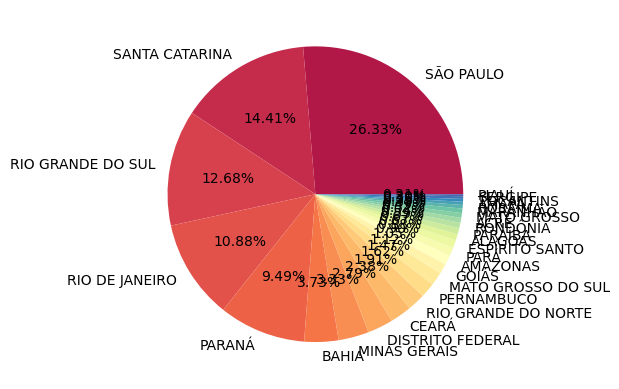

In [59]:
plt.pie(k22_ufs_series, labels=k22_ufs_series.index,
        colors=colors, autopct='%1.2f%%')

## Descrição estatística

In [60]:
k22_ufs.describe()

,total
count,27.000000
mean,538.111111
std,879.557508
min,31.000000
25%,77.000000
50%,152.000000
75%,444.500000
max,3825.000000


## Gráfico em caixa

<Axes: >

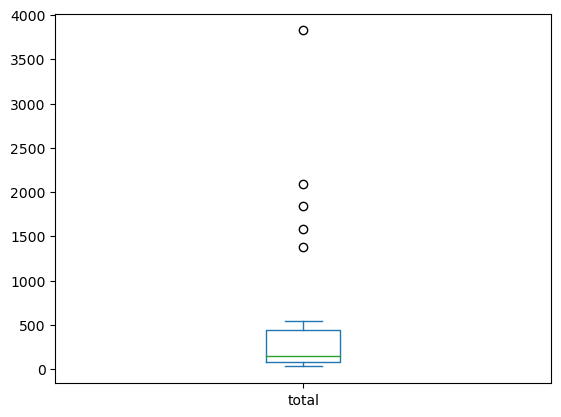

In [61]:
k22_ufs.plot(kind='box')

## Dados de cada continente

In [62]:
k22_continents = per_continent(k22)
k22_continents = k22_continents.sort_values(by='total', ascending=False,
                                            ignore_index=True)
k22_continents

,continente,total
0,AMÉRICA DO SUL,6754
1,EUROPA,2499
2,ÁSIA,2018
3,AMÉRICA CENTRAL E CARIBE,1361
4,ÁFRICA,1314
5,AMÉRICA DO NORTE,529
6,OCEANIA,42
7,NÃO ESPECIFICADO,12


## Gráfico de barras (escala logarítmica)

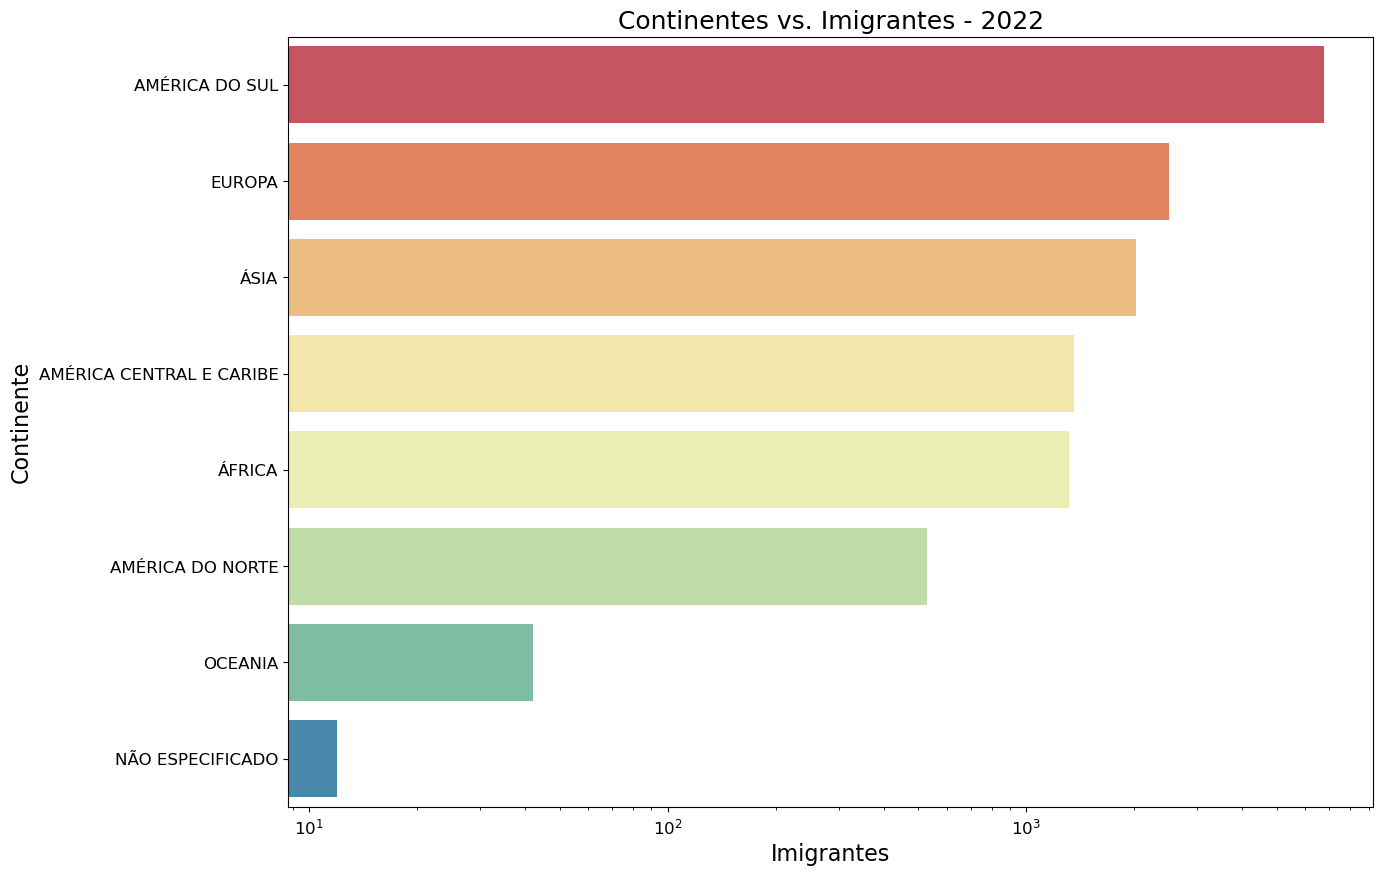

In [63]:
plt.figure(figsize=(14,10))
ax_log = sns.barplot(k22_continents,x='total',y='continente',palette="Spectral")
ax_log.axes.set_title("Continentes vs. Imigrantes - 2022",fontsize=18)
ax_log.set_xlabel("Imigrantes",fontsize=16)
ax_log.set_ylabel("Continente",fontsize=16)
ax_log.tick_params(labelsize=12)
ax_log.set_xscale("log")
plt.show()

In [64]:
list_k22_continents = list(k22_continents['continente'])
list_k22_numbers = list(k22_continents['total'])
k22_continents_series = pd.Series(list_k22_numbers, index=list_k22_continents)
k22_continents_series

AMÉRICA DO SUL              6754
EUROPA                      2499
ÁSIA                        2018
AMÉRICA CENTRAL E CARIBE    1361
ÁFRICA                      1314
AMÉRICA DO NORTE             529
OCEANIA                       42
NÃO ESPECIFICADO              12
dtype: int64

## Gráfico em porcentagens

([<matplotlib.patches.Wedge at 0x23291efcf10>,
 [Text(0.12117697129049608, 1.0933051457067522, 'AMÉRICA DO SUL'),
  Text(-1.044301883444906, -0.345591632180847, 'EUROPA'),
  Text(-0.2981752146708211, -1.0588161036535144, 'ÁSIA'),
  Text(0.4845300375604518, -0.9875376664723566, 'AMÉRICA CENTRAL E CARIBE'),
  Text(0.9455947666629856, -0.5620058160371422, 'ÁFRICA'),
  Text(1.089582036430529, -0.1510330622344033, 'AMÉRICA DO NORTE'),
  Text(1.0998879870417675, -0.01569764189962136, 'OCEANIA'),
  Text(1.0999962971543171, -0.0028541630631798427, 'NÃO ESPECIFICADO')],
 [Text(0.06609652979481603, 0.596348261294592, '46.49%'),
  Text(-0.5696192091517669, -0.18850452664409834, '17.20%'),
  Text(-0.16264102618408421, -0.5775360565382806, '13.89%'),
  Text(0.26428911139661004, -0.5386569089849217, '9.37%'),
  Text(0.5157789636343557, -0.3065486269293502, '9.04%'),
  Text(0.5943174744166522, -0.08238167030967453, '3.64%'),
  Text(0.5999389020227822, -0.008562350127066194, '0.29%'),
  Text(0.5999979

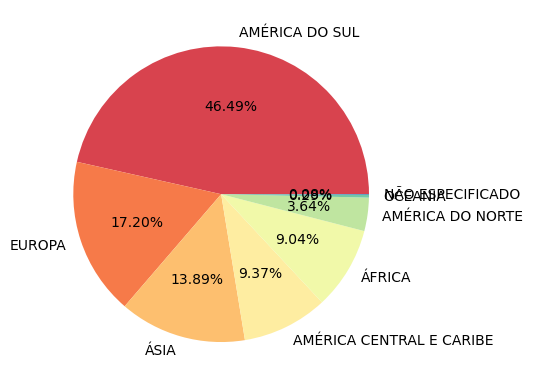

In [65]:
plt.pie(k22_continents_series, labels=k22_continents_series.index,
        colors=sns.color_palette("Spectral",n_colors=8), autopct='%1.2f%%')

## Descrição estatística

In [66]:
k22_continents.describe()

,total
count,8.000000
mean,1816.125000
std,2184.622454
min,12.000000
25%,407.250000
50%,1337.500000
75%,2138.250000
max,6754.000000
